# Чекпоинт 1

In [ ]:
!pip install gdown

In [ ]:
import gdown
import pandas as pd

file_id = '1_8Jv4vEDS0luWn8TcObTT_WSUCUrPFHL'

url = f'https://drive.google.com/uc?id={file_id}'

output = 'dataset.csv'
gdown.download(url, output, quiet=False)

df = pd.read_csv(output)

df.head()

Downloading...
From: https://drive.google.com/uc?id=1_8Jv4vEDS0luWn8TcObTT_WSUCUrPFHL
To: /content/dataset.csv
100%|██████████| 26.3M/26.3M [00:00<00:00, 145MB/s]


transaction_id  user_id  account_age_days  total_transactions_user  \
0               1        1               141                       47   
1               2        1               141                       47   
2               3        1               141                       47   
3               4        1               141                       47   
4               5        1               141                       47   

   avg_amount_user  amount country bin_country channel merchant_category  \
0           147.93   84.75      FR          FR     web            travel   
1           147.93  107.90      FR          FR     web            travel   
2           147.93   92.36      FR          FR     app            travel   
3           147.93  112.47      FR          FR     web           fashion   
4           147.93  132.91      FR          US     web       electronics   

   promo_used  avs_match  cvv_result  three_ds_flag      transaction_time  \
0           0          1           1              1  2024-01-06T04:09:39Z   
1           0          0           0              0  2024-01-09T20:13:47Z   
2           1          1           1              1  2024-01-12T06:20:11Z   
3           0          1           1              1  2024-01-15T17:00:04Z   
4           0          1           1              1  2024-01-17T01:27:31Z   

   shipping_distance_km  is_fraud  
0                370.95         0  
1                149.62         0  
2                164.08         0  
3                397.40         0  
4                935.28         0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

# Приводим типы
df["transaction_time"] = pd.to_datetime(df["transaction_time"], utc=True)
for col in ["promo_used", "avs_match", "cvv_result", "three_ds_flag", "is_fraud"]:
    df[col] = df[col].astype("int8")
df["transaction_id"] = df["transaction_id"].astype("int64")
df["user_id"] = df["user_id"].astype("int64")

## EDA

In [ ]:
df.shape
df.info()
df.isna().mean().sort_values(ascending=False)# доля пропусков по колонкам
df["transaction_id"].is_unique
df.duplicated().sum()# полные дубликаты строк
df.duplicated(subset=["transaction_id"]).sum()# дубли по ID

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299695 entries, 0 to 299694
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   transaction_id           299695 non-null  int64              
 1   user_id                  299695 non-null  int64              
 2   account_age_days         299695 non-null  int64              
 3   total_transactions_user  299695 non-null  int64              
 4   avg_amount_user          299695 non-null  float64            
 5   amount                   299695 non-null  float64            
 6   country                  299695 non-null  object             
 7   bin_country              299695 non-null  object             
 8   channel                  299695 non-null  object             
 9   merchant_category        299695 non-null  object             
 10  promo_used               299695 non-null  int8               
 11  avs_match    

np.int64(0)

Приятно, что не все числовые данные формата "64".

Может быть будет полезно сократить 64 до 32.

Может быть преобразуем объекты в числа

In [ ]:
fraud_rate = df["is_fraud"].mean()
print(f"Доля мошеннических транзакций: {fraud_rate:.3%}")

Доля мошеннических транзакций: 2.206%


С таким маленьким процентом могут возникнуть проблемы с точностью. Обращаем на это внимание

In [ ]:
num_cols = ["account_age_days", "total_transactions_user", "avg_amount_user", "amount", "shipping_distance_km"]

df[num_cols].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])

account_age_days  total_transactions_user  avg_amount_user  \
count     299695.000000            299695.000000    299695.000000   
mean         973.397871                50.673321       148.142973   
std          525.241409                 5.976391       200.364624   
min            1.000000                40.000000         3.520000   
1%            43.000000                40.000000         8.400000   
5%           149.000000                41.000000        17.610000   
25%          516.000000                46.000000        46.190000   
50%          975.000000                51.000000        90.130000   
75%         1425.000000                56.000000       173.450000   
95%         1789.000000                60.000000       466.360000   
99%         1870.000000                60.000000       916.020000   
max         1890.000000                60.000000      4565.290000   

              amount  shipping_distance_km  
count  299695.000000         299695.000000  
mean      177.165279            357.049028  
std       306.926507            427.672074  
min         1.000000              0.000000  
1%          5.220000              5.410000  
5%         13.590000             27.690000  
25%        42.100000            136.600000  
50%        89.990000            273.020000  
75%       191.110000            409.180000  
95%       596.453000           1279.436000  
99%      1508.021200           2333.573000  
max     16994.740000           3748.560000

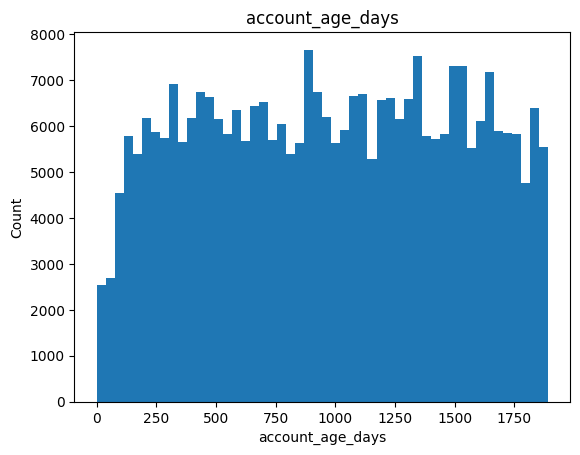

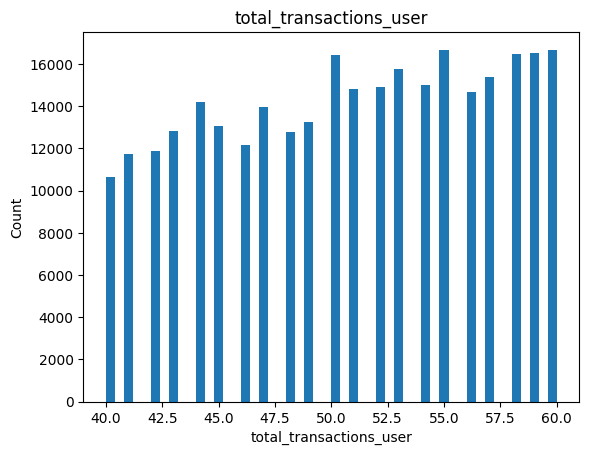

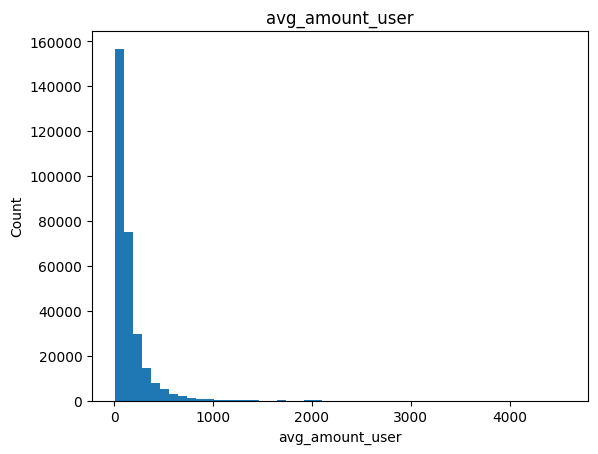

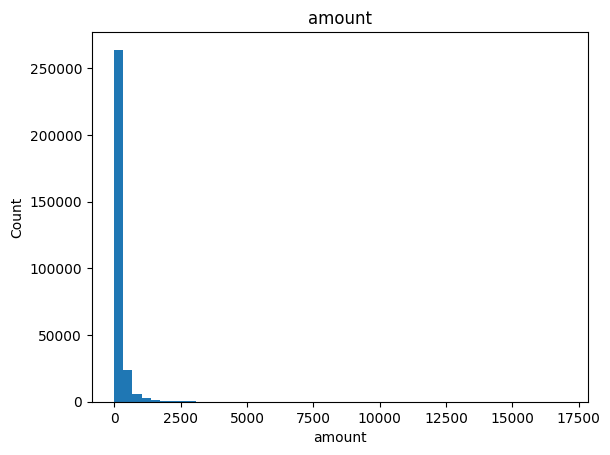

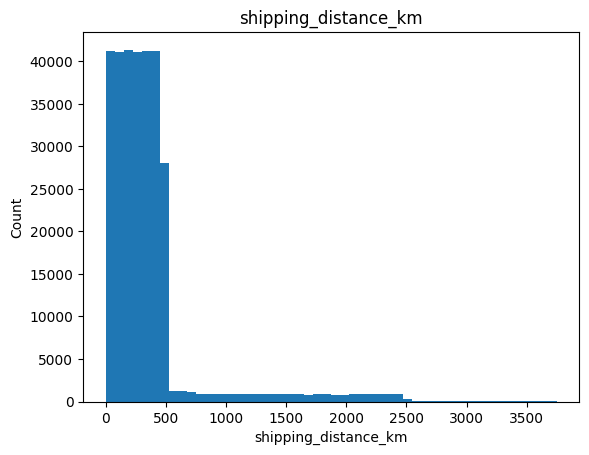

In [ ]:
for col in num_cols:
    plt.hist(df[col].dropna(), bins=50)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

Большинство клиентов заказывали товары без доставки/из соседнего города, скорее всего. Интересно, что примрено одинаковое их число заказывает на расстояние от 1000 до 2400 км

Любопытно, что возраст аккаунта имеет примерно равномерное распределение

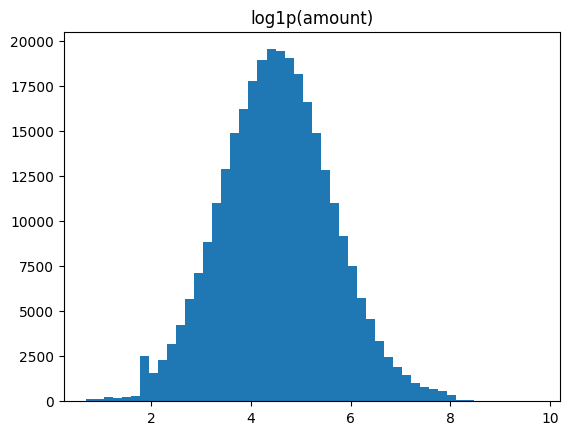

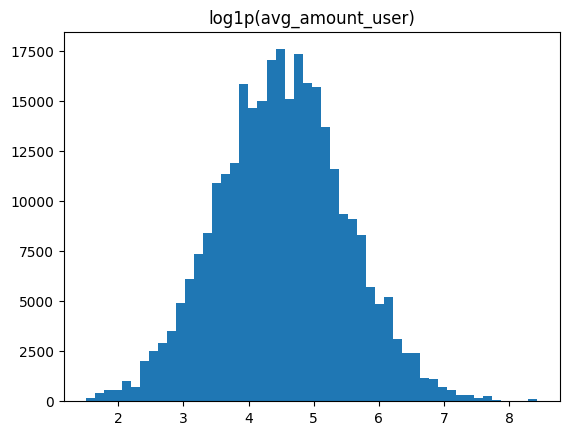

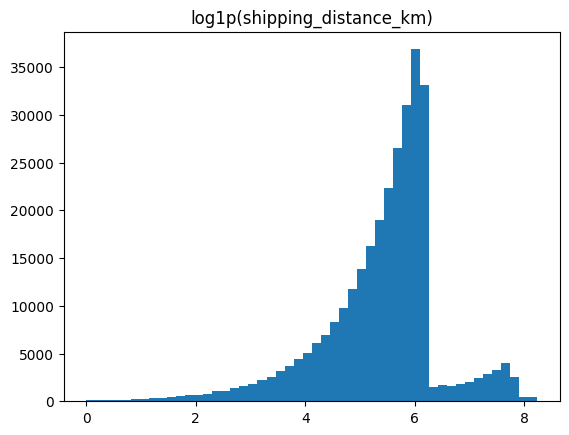

In [ ]:
for col in ["amount", "avg_amount_user", "shipping_distance_km"]:
    plt.hist(np.log1p(df[col].dropna()), bins=50)
    plt.title(f"log1p({col})")
    plt.show()

In [ ]:
df.groupby("is_fraud")[num_cols].describe()

account_age_days                                                     \
                    count        mean         std  min    25%    50%     75%   
is_fraud                                                                       
0                293083.0  982.891642  519.370380  1.0  532.0  987.0  1432.0   
1                  6612.0  552.577737  605.554976  1.0   49.0  205.0  1063.0   

                 total_transactions_user                                   \
             max                   count       mean       std   min   25%   
is_fraud                                                                    
0         1890.0                293083.0  50.688665  5.973937  40.0  46.0   
1         1890.0                  6612.0  49.993194  6.045668  40.0  45.0   

                           avg_amount_user                                \
           50%   75%   max           count        mean         std   min   
is_fraud                                                                   
0         51.0  56.0  60.0        293083.0  148.180170  200.843570  3.52   
1         50.0  55.0  60.0          6612.0  146.494155  177.849561  3.52   

                                           amount                          \
            25%    50%     75%      max     count        mean         std   
is_fraud                                                                    
0         46.27  90.14  173.57  4565.29  293083.0  167.829976  273.644198   
1         44.61  87.25  166.56  2024.16    6612.0  590.961199  880.753262   

                                                    shipping_distance_km  \
          min      25%     50%        75%       max                count   
is_fraud                                                                   
0         5.0  42.3500   89.84   189.0600  16994.74             293083.0   
1         1.0  21.3175  103.16  1061.1225   5716.46               6612.0   

                                                                        \
                 mean          std   min       25%      50%        75%   
is_fraud                                                                 
0          339.704956   383.750165  0.00  134.9100  269.490   404.1900   
1         1125.841016  1076.308104  0.16  312.1575  626.305  1860.0925   

                   
              max  
is_fraud           
0         2500.00  
1         3748.56

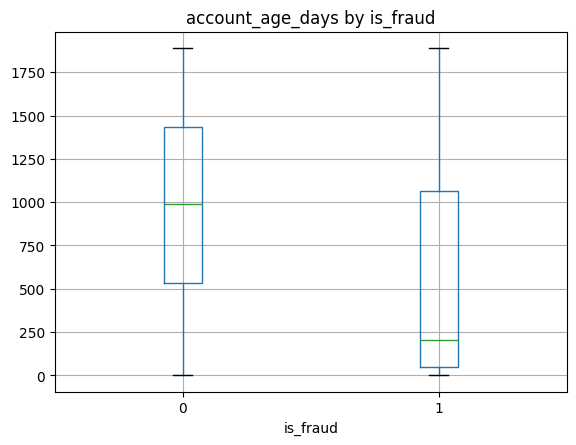

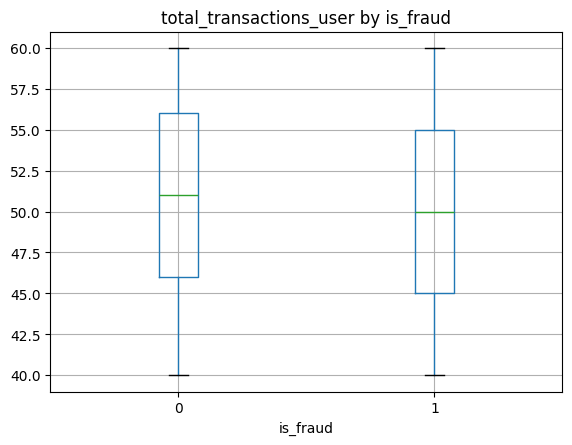

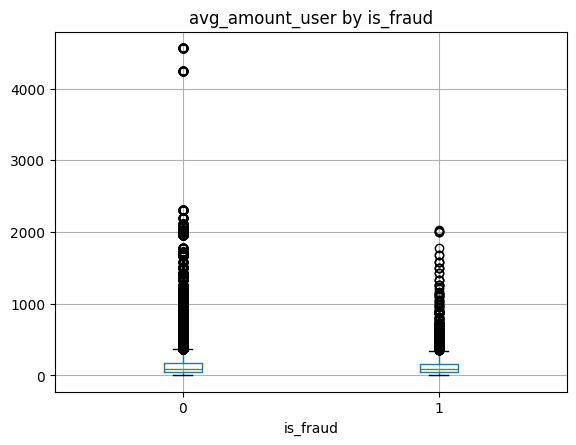

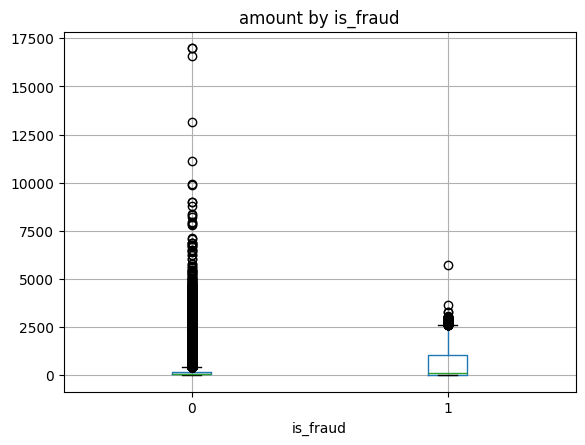

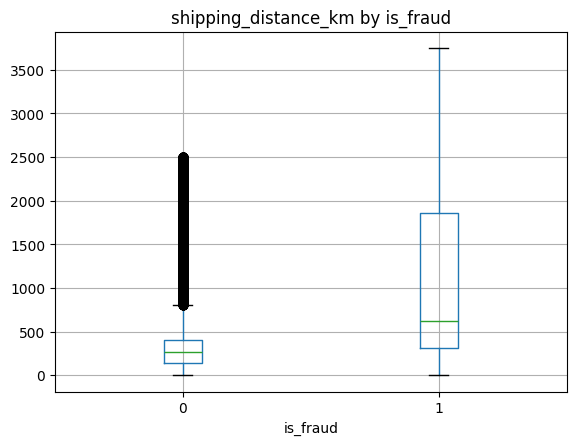

In [ ]:
for col in num_cols:
    df.boxplot(column=col, by="is_fraud")
    plt.title(f"{col} by is_fraud")
    plt.suptitle("")
    plt.show()

Величина разброса у мошеннических операций может оказаться проблематичной

In [ ]:
def fraud_rate_by_bin(col, q=10):
    df_tmp = df.copy()
    df_tmp["_bin"] = pd.qcut(df_tmp[col], q=q, duplicates="drop")
    return df_tmp.groupby("_bin")["is_fraud"].mean()

for col in ["amount", "shipping_distance_km", "account_age_days"]:
    print(f"\nFraud rate по квантилям для {col}")
    print(fraud_rate_by_bin(col))


Fraud rate по квантилям для amount
_bin
(0.999, 21.03]         0.054849
(21.03, 34.86]         0.011912
(34.86, 49.95]         0.011276
(49.95, 67.81]         0.012779
(67.81, 89.99]         0.013445
(89.99, 119.624]       0.012619
(119.624, 161.488]     0.013147
(161.488, 231.32]      0.011945
(231.32, 384.626]      0.011212
(384.626, 16994.74]    0.067434
Name: is_fraud, dtype: float64

Fraud rate по квантилям для shipping_distance_km
_bin
(-0.001, 54.544]     0.009142
(54.544, 109.46]     0.010076
(109.46, 163.54]     0.009776
(163.54, 217.97]     0.009677
(217.97, 273.02]     0.009542
(273.02, 327.1]      0.009811
(327.1, 382.03]      0.009877
(382.03, 436.36]     0.009810
(436.36, 491.04]     0.008474
(491.04, 3748.56]    0.134457
Name: is_fraud, dtype: float64

Fraud rate по квантилям для account_age_days
_bin
(0.999, 246.0]      0.112282
(246.0, 432.0]      0.011098
(432.0, 611.0]      0.012466
(611.0, 796.0]      0.011940
(796.0, 975.0]      0.012056
(975.0, 1161.0]     0.0118

In [ ]:
cat_cols = ["country", "bin_country", "channel", "merchant_category"]
for col in cat_cols:
    print(f"\n=== {col} ===")
    print(df[col].value_counts().head(20))
    print(df[col].value_counts(normalize=True).head(20))


=== country ===
country
US    32430
GB    30602
FR    30343
NL    30220
TR    30074
PL    29965
RO    29501
DE    29060
ES    28885
IT    28615
Name: count, dtype: int64
country
US    0.108210
GB    0.102110
FR    0.101246
NL    0.100836
TR    0.100349
PL    0.099985
RO    0.098437
DE    0.096965
ES    0.096381
IT    0.095480
Name: proportion, dtype: float64

=== bin_country ===
bin_country
US    32295
GB    30563
FR    30261
NL    30256
TR    29972
PL    29963
RO    29532
DE    29086
ES    29058
IT    28709
Name: count, dtype: int64
bin_country
US    0.107760
GB    0.101980
FR    0.100973
NL    0.100956
TR    0.100008
PL    0.099978
RO    0.098540
DE    0.097052
ES    0.096959
IT    0.095794
Name: proportion, dtype: float64

=== channel ===
channel
web    152226
app    147469
Name: count, dtype: int64
channel
web    0.507936
app    0.492064
Name: proportion, dtype: float64

=== merchant_category ===
merchant_category
electronics    60220
travel         59922
grocery        59913
gami

In [ ]:
bin_cols = ["promo_used", "avs_match", "cvv_result", "three_ds_flag"]
for col in bin_cols:
    print(f"\n=== {col} ===")
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True))


=== promo_used ===
promo_used
0    253650
1     46045
Name: count, dtype: int64
promo_used
0    0.84636
1    0.15364
Name: proportion, dtype: float64

=== avs_match ===
avs_match
1    251144
0     48551
Name: count, dtype: int64
avs_match
1    0.837999
0    0.162001
Name: proportion, dtype: float64

=== cvv_result ===
cvv_result
1    261367
0     38328
Name: count, dtype: int64
cvv_result
1    0.87211
0    0.12789
Name: proportion, dtype: float64

=== three_ds_flag ===
three_ds_flag
1    235137
0     64558
Name: count, dtype: int64
three_ds_flag
1    0.784588
0    0.215412
Name: proportion, dtype: float64


In [ ]:
def fraud_stats_by_cat(col, min_count=50):
    stats = (
        df.groupby(col)
          .agg(
              n=("is_fraud", "size"),
              fraud_rate=("is_fraud", "mean")
          )
          .sort_values("fraud_rate", ascending=False)
    )
    return stats[stats["n"] >= min_count]

for col in ["country", "bin_country", "channel", "merchant_category"]:
    print(f"\n==== {col} ====")
    print(fraud_stats_by_cat(col))


==== country ====
             n  fraud_rate
country                   
TR       30074    0.028031
RO       29501    0.024033
PL       29965    0.023394
ES       28885    0.023126
US       32430    0.023065
FR       30343    0.021883
IT       28615    0.021213
GB       30602    0.021175
NL       30220    0.017836
DE       29060    0.016690

==== bin_country ====
                 n  fraud_rate
bin_country                   
TR           29972    0.026058
PL           29963    0.023329
RO           29532    0.022992
ES           29058    0.022920
IT           28709    0.022327
US           32295    0.022016
GB           30563    0.021791
FR           30261    0.021612
NL           30256    0.019566
DE           29086    0.017981

==== channel ====
              n  fraud_rate
channel                    
web      152226    0.035644
app      147469    0.008042

==== merchant_category ====
                       n  fraud_rate
merchant_category                   
travel             59922    

In [ ]:
for col in ["promo_used", "avs_match", "cvv_result", "three_ds_flag"]:
    ctab = (
        df.groupby(col)["is_fraud"]
          .agg(["mean", "size"])
          .rename(columns={"mean": "fraud_rate", "size": "n"})
    )
    print(f"\n==== {col} ====")
    print(ctab)


==== promo_used ====
            fraud_rate       n
promo_used                    
0             0.017847  253650
1             0.045282   46045

==== avs_match ====
           fraud_rate       n
avs_match                    
0            0.096661   48551
1            0.007641  251144

==== cvv_result ====
            fraud_rate       n
cvv_result                    
0             0.106058   38328
1             0.009745  261367

==== three_ds_flag ====
               fraud_rate       n
three_ds_flag                    
0                0.067521   64558
1                0.009582  235137


In [ ]:
df["date"] = df["transaction_time"].dt.date
df["hour"] = df["transaction_time"].dt.hour
df["day_of_week"] = df["transaction_time"].dt.dayofweek# 0=Monday
df["is_weekend"] = df["day_of_week"].isin([5, 6]).astype(int)

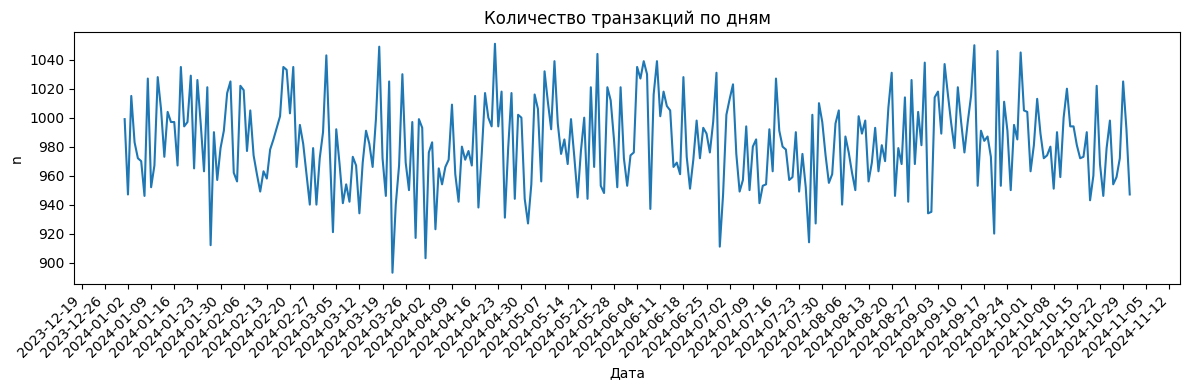

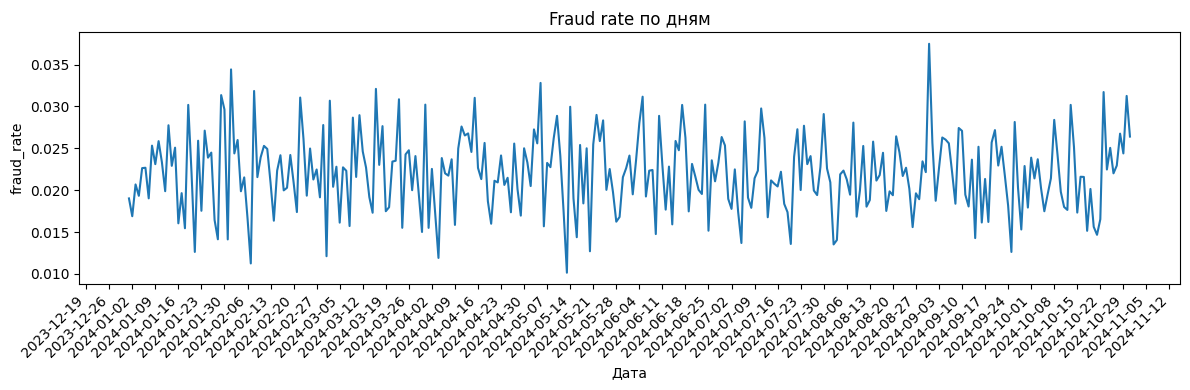

In [ ]:
import matplotlib.dates as mdates

daily = df.groupby("date").agg(n=("transaction_id", "size"),fraud_rate=("is_fraud", "mean"))

plt.figure(figsize=(12, 4))
plt.plot(daily.index, daily["n"])
plt.title("Количество транзакций по дням")
plt.ylabel("n")
plt.xlabel("Дата")

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # подпись раз в неделю
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(daily.index, daily["fraud_rate"])
plt.title("Fraud rate по дням")
plt.ylabel("fraud_rate")
plt.xlabel("Дата")

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

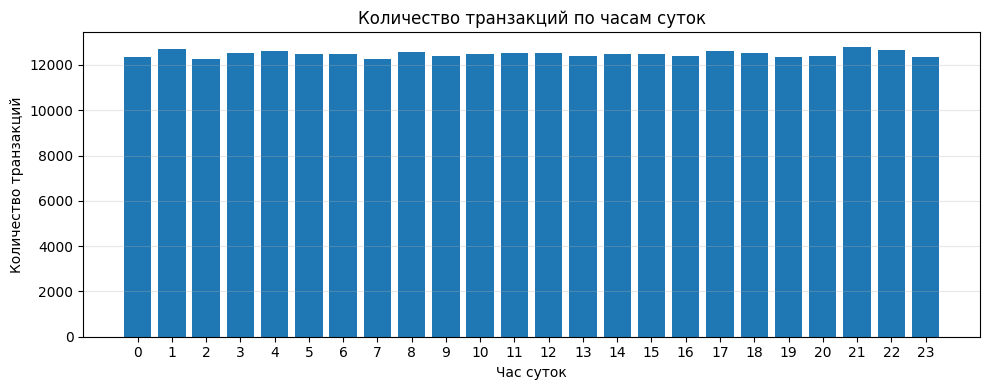

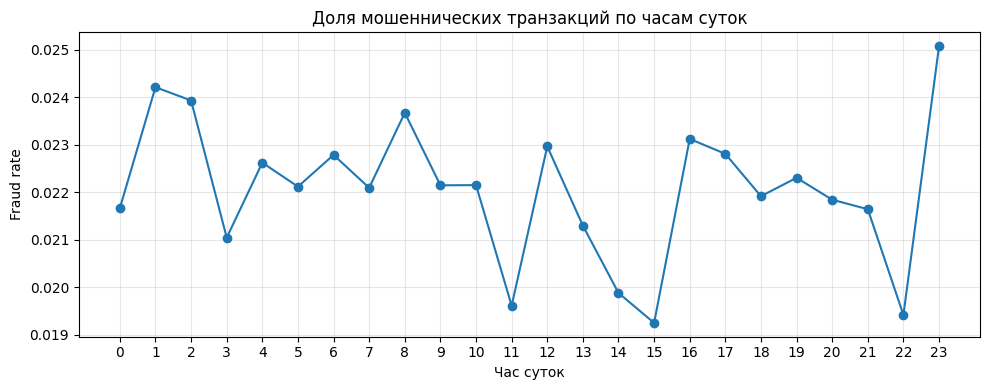

In [ ]:
hourly = df.groupby("hour").agg(n=("transaction_id", "size"),fraud_rate=("is_fraud", "mean")).reset_index()

plt.figure(figsize=(10, 4))
plt.bar(hourly["hour"], hourly["n"])
plt.xticks(range(0, 24))
plt.xlabel("Час суток")
plt.ylabel("Количество транзакций")
plt.title("Количество транзакций по часам суток")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(hourly["hour"], hourly["fraud_rate"], marker="o")
plt.xticks(range(0, 24))
plt.xlabel("Час суток")
plt.ylabel("Fraud rate")
plt.title("Доля мошеннических транзакций по часам суток")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

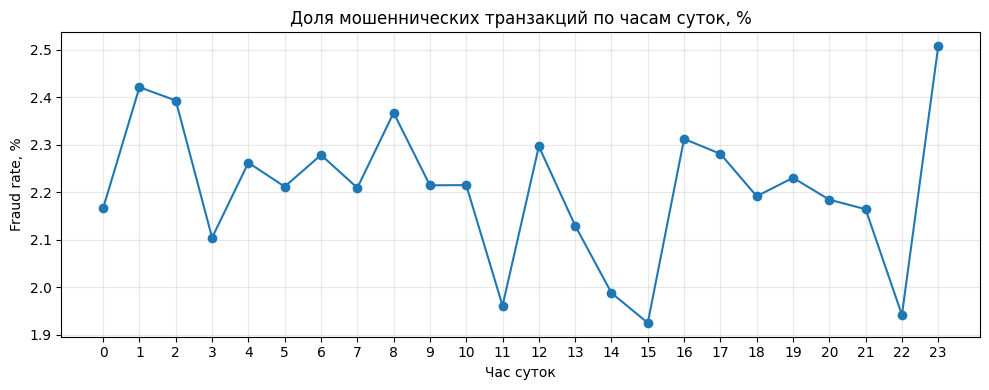

In [ ]:
hourly["fraud_rate_pct"] = hourly["fraud_rate"] * 100

plt.figure(figsize=(10, 4))
plt.plot(hourly["hour"], hourly["fraud_rate_pct"], marker="o")
plt.xticks(range(0, 24))
plt.xlabel("Час суток")
plt.ylabel("Fraud rate, %")
plt.title("Доля мошеннических транзакций по часам суток, %")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
df["day_of_week"] = df["transaction_time"].dt.dayofweek# 0=Monday, 6=Sunday
df["is_weekend"] = df["day_of_week"].isin([5, 6]).astype(int)

dow = df.groupby("day_of_week").agg(n=("transaction_id", "size"),fraud_rate=("is_fraud", "mean")).reset_index()

day_labels = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"}
dow["day_name"] = dow["day_of_week"].map(day_labels)

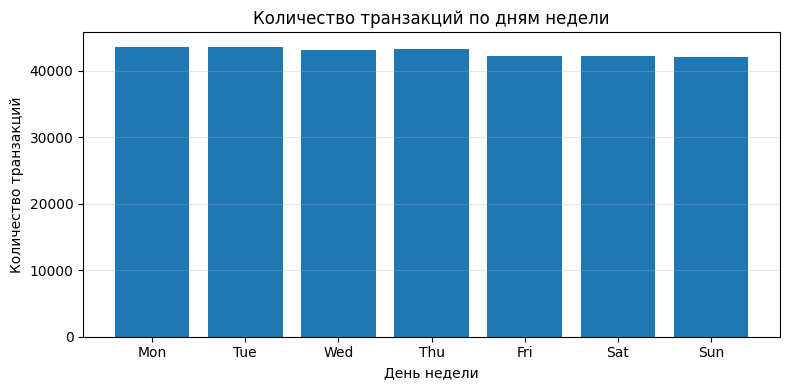

In [ ]:
plt.figure(figsize=(8, 4))
plt.bar(dow["day_name"], dow["n"])
plt.xlabel("День недели")
plt.ylabel("Количество транзакций")
plt.title("Количество транзакций по дням недели")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

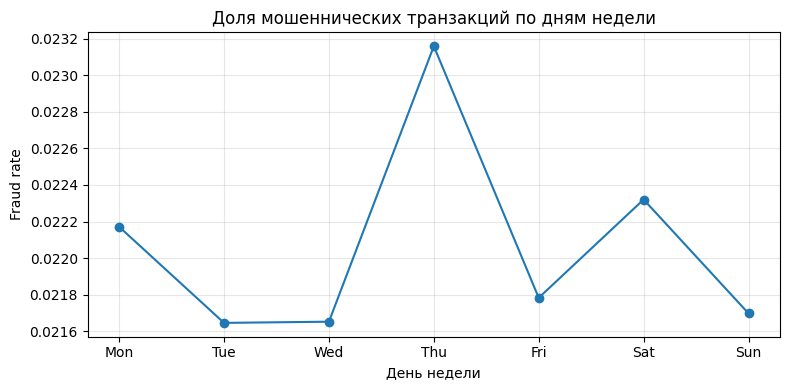

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(dow["day_name"], dow["fraud_rate"], marker="o")
plt.xlabel("День недели")
plt.ylabel("Fraud rate")
plt.title("Доля мошеннических транзакций по дням недели")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

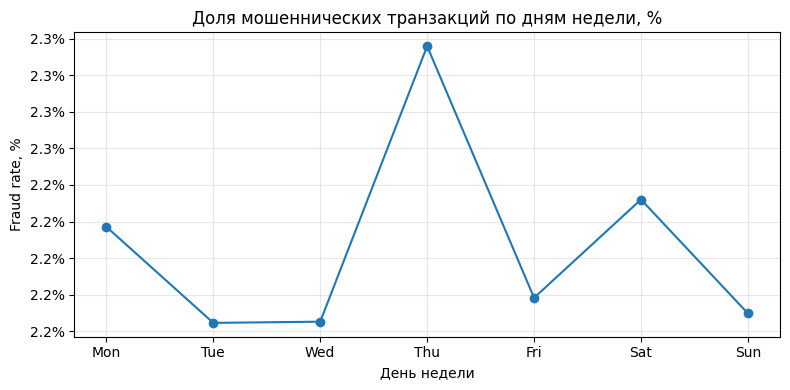

In [ ]:
from matplotlib.ticker import FuncFormatter

dow["fraud_rate_pct"] = dow["fraud_rate"] * 100

plt.figure(figsize=(8, 4))
plt.plot(dow["day_name"], dow["fraud_rate_pct"], marker="o")
plt.xlabel("День недели")
plt.ylabel("Fraud rate, %")
plt.title("Доля мошеннических транзакций по дням недели, %")
plt.grid(True, alpha=0.3)

ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.1f}%"))

plt.tight_layout()
plt.show()

In [ ]:
num_cols = [
    "account_age_days",
    "total_transactions_user",
    "avg_amount_user",
    "amount",
    "shipping_distance_km",
    "is_fraud"
]

corr = df[num_cols].corr()
print(corr)

                         account_age_days  total_transactions_user  \
account_age_days                 1.000000                -0.034347   
total_transactions_user         -0.034347                 1.000000   
avg_amount_user                 -0.009951                -0.004743   
amount                          -0.032084                -0.005819   
shipping_distance_km            -0.031924                -0.005559   
is_fraud                        -0.120340                -0.017093   

                         avg_amount_user    amount  shipping_distance_km  \
account_age_days               -0.009951 -0.032084             -0.031924   
total_transactions_user        -0.004743 -0.005819             -0.005559   
avg_amount_user                 1.000000  0.731955             -0.000942   
amount                          0.731955  1.000000              0.053686   
shipping_distance_km           -0.000942  0.053686              1.000000   
is_fraud                       -0.001236  0.202499   

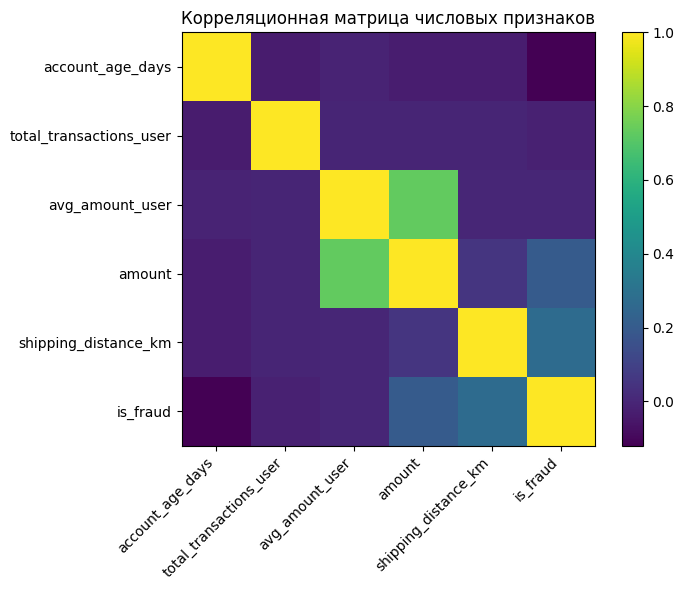

In [ ]:
plt.figure(figsize=(8, 6))
im = plt.imshow(corr, interpolation="nearest")
plt.colorbar(im, fraction=0.046, pad=0.04)

plt.xticks(range(len(num_cols)), num_cols, rotation=45, ha="right")
plt.yticks(range(len(num_cols)), num_cols)

plt.title("Корреляционная матрица числовых признаков")
plt.tight_layout()
plt.show()

Судя по матрице, можно предположить, что

In [ ]:
df["is_cross_border"] = (df["country"] != df["bin_country"]).astype(int)

df.groupby("is_cross_border")["is_fraud"].agg(["mean", "size"]).rename(
    columns={"mean": "fraud_rate", "size": "n"}
)

fraud_rate       n
is_cross_border                    
0                  0.014263  275965
1                  0.112769   23730

In [ ]:
fraud_by_country = (
    df.groupby("country")["is_fraud"]
      .agg(["mean", "size"])
      .rename(columns={"mean": "fraud_rate", "size": "n"})
      .sort_values("fraud_rate", ascending=False)
)

fraud_by_country[fraud_by_country["n"] >= 50].head(20)

fraud_rate      n
country                   
TR         0.028031  30074
RO         0.024033  29501
PL         0.023394  29965
ES         0.023126  28885
US         0.023065  32430
FR         0.021883  30343
IT         0.021213  28615
GB         0.021175  30602
NL         0.017836  30220
DE         0.016690  29060

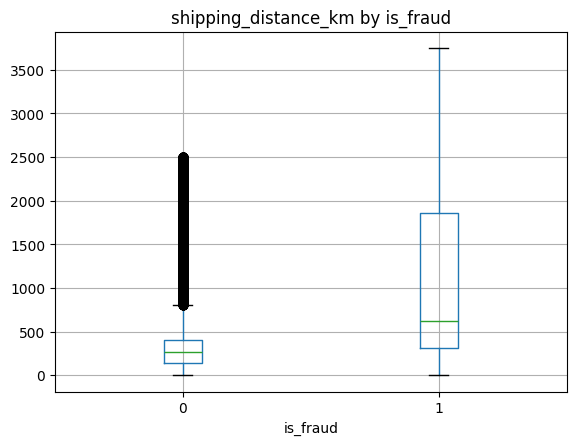

_bin
(-0.001, 54.544]     0.009142
(54.544, 109.46]     0.010076
(109.46, 163.54]     0.009776
(163.54, 217.97]     0.009677
(217.97, 273.02]     0.009542
(273.02, 327.1]      0.009811
(327.1, 382.03]      0.009877
(382.03, 436.36]     0.009810
(436.36, 491.04]     0.008474
(491.04, 3748.56]    0.134457
Name: is_fraud, dtype: float64


In [ ]:
df[["shipping_distance_km"]].describe()

df.boxplot(column="shipping_distance_km", by="is_fraud")
plt.suptitle("")
plt.title("shipping_distance_km by is_fraud")
plt.show()

print(fraud_rate_by_bin("shipping_distance_km"))

In [ ]:
user_tx_counts = df["user_id"].value_counts()
user_tx_counts.describe()

count    6000.000000
mean       49.949167
std         6.014727
min        40.000000
25%        45.000000
50%        50.000000
75%        55.000000
max        60.000000
Name: count, dtype: float64

In [ ]:
heavy_users = user_tx_counts[user_tx_counts >= 20]
heavy_users.head()

user_id
1409    60
5966    60
33      60
1370    60
36      60
Name: count, dtype: int64

In [ ]:
df_user = df.groupby("user_id").agg(n_tx=("transaction_id", "size"),n_fraud=("is_fraud", "sum"))
df_user["fraud_rate"] = df_user["n_fraud"] / df_user["n_tx"]

fraud_by_n_tx = (
    df_user.groupby(pd.qcut(df_user["n_tx"], q=10, duplicates="drop"))["fraud_rate"]
           .mean()
)
fraud_by_n_tx

n_tx
(39.999, 42.0]    0.025072
(42.0, 44.0]      0.027099
(44.0, 46.0]      0.024154
(46.0, 48.0]      0.025268
(48.0, 50.0]      0.023500
(50.0, 52.0]      0.018929
(52.0, 54.0]      0.021919
(54.0, 56.0]      0.015338
(56.0, 58.0]      0.020645
(58.0, 60.0]      0.020038
Name: fraud_rate, dtype: float64

In [ ]:
df["amount_over_avg"] = df["amount"] / (df["avg_amount_user"] + 1e-6)
df["amount_diff_avg"] = df["amount"] - df["avg_amount_user"]

In [ ]:
for col in ["amount_over_avg", "amount_diff_avg"]:
    print(df.groupby("is_fraud")[col].describe(), "\n")
    print(fraud_rate_by_bin(col))

             count      mean        std       min       25%       50%  \
is_fraud                                                                
0         293083.0  1.134028   0.601484  0.107212  0.715718  1.001205   
1           6612.0  9.471451  26.669792  0.001276  0.529606  1.070065   

               75%         max  
is_fraud                        
0         1.401287    9.786631  
1         2.966660  597.512480   

_bin
(0.0002800000000000001, 0.524]    0.054655
(0.524, 0.656]                    0.012313
(0.656, 0.769]                    0.012012
(0.769, 0.882]                    0.012513
(0.882, 1.002]                    0.012145
(1.002, 1.138]                    0.012246
(1.138, 1.305]                    0.012146
(1.305, 1.534]                    0.012045
(1.534, 1.924]                    0.013114
(1.924, 597.512]                  0.067434
Name: is_fraud, dtype: float64
             count        mean         std      min     25%   50%       75%  \
is_fraud                    

In [ ]:
df["avs_cvv_3ds"] = (
    df["avs_match"].astype(str) +
    df["cvv_result"].astype(str) +
    df["three_ds_flag"].astype(str)
)

fraud_by_combo = (
    df.groupby("avs_cvv_3ds")["is_fraud"]
      .agg(["mean", "size"])
      .rename(columns={"mean": "fraud_rate", "size": "n"})
      .sort_values("fraud_rate", ascending=False)
)

fraud_by_combo

fraud_rate       n
avs_cvv_3ds                    
000            0.180848   18745
010            0.081367    3306
001            0.052609    7052
011            0.034091   19448
100            0.030708    8825
110            0.012737   33682
101            0.008904    3706
111            0.005787  204931

## Baseline (демо)

Попробуем ввести новые признаки для потенциального улучшения корреляций

In [ ]:
!pip install catboost lightgbm scikit-learn pandas numpy matplotlib optuna seaborn -q

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    average_precision_score,
    precision_recall_curve,
    roc_curve,
)

from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt

In [ ]:
df['is_cross_border'] = (df['country'] != df['bin_country']).astype(int)

# просто комбинируем 3 признака для общего счётчика безопасности
df['security_score'] = df['avs_match'] + df['cvv_result'] + df['three_ds_flag']

# Описание датасета сделало акцент на времени подозрительных операций
df['transaction_time'] = pd.to_datetime(df['transaction_time'])
df['hour'] = df['transaction_time'].dt.hour
df['day_of_week'] = df['transaction_time'].dt.dayofweek
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)

In [ ]:
drop_cols = [
    'transaction_id',
    'user_id',
    'transaction_time',
    'is_fraud',
    'date'
]

In [ ]:
X = df.drop(columns=drop_cols)
y = df['is_fraud']

In [ ]:
cat_cols = [
    'country',
    'bin_country',
    'channel',
    'merchant_category',
    'avs_cvv_3ds'
]
for col in cat_cols:
    X[col] = X[col].astype(str)

In [ ]:
cat_features_indices = [X.columns.get_loc(col) for col in cat_cols]

print(f"Размер датасета: {X.shape}")
print(f"Распределение классов:\n{y.value_counts(normalize=True)}")

Размер датасета: (299695, 21)
Распределение классов:
is_fraud
0    0.977938
1    0.022062
Name: proportion, dtype: float64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"В трейне объектов: {X_train.shape}")
print(f"В тесте объектов: {X_test.shape}")

В трейне объектов: (239756, 21)
В тесте объектов: (59939, 21)


In [ ]:
train_pool = Pool(X_train, y_train, cat_features=cat_features_indices)
test_pool = Pool(X_test, y_test, cat_features=cat_features_indices)

In [ ]:
cb_baseline = CatBoostClassifier(
    loss_function='Logloss',
    eval_metric='AUC',
    depth=6,
    learning_rate=0.1,
    iterations=300,
    random_seed=42,
    class_weights=[1.0, 1.0 / y.mean()],
    verbose=100
)

cb_baseline.fit(
    train_pool,
    eval_set=test_pool,
    use_best_model=True
)

y_pred_proba = cb_baseline.predict_proba(test_pool)[:, 1]
y_pred = (y_pred_proba >= 0.5).astype(int)

0:	test: 0.9603757	best: 0.9603757 (0)	total: 496ms	remaining: 2m 28s
100:	test: 0.9772918	best: 0.9778403 (41)	total: 35.4s	remaining: 1m 9s
200:	test: 0.9769359	best: 0.9778403 (41)	total: 1m 21s	remaining: 40s
299:	test: 0.9766455	best: 0.9778403 (41)	total: 2m 6s	remaining: 0us

bestTest = 0.9778403032
bestIteration = 41

Shrink model to first 42 iterations.


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(f"\nTrue Negatives: {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives: {cm[1,1]}")

print("\nПо метрикам:")
print(classification_report(y_test, y_pred, target_names=['Legitimate', 'Fraud']))

roc_auc = roc_auc_score(y_test, y_pred_proba)
pr_auc = average_precision_score(y_test, y_pred_proba)

print(f"\nROC AUC Score: {roc_auc:.5f}")
print(f"Средняя точность: {pr_auc:.5f}")

Confusion Matrix:
[[55749  2868]
 [  111  1211]]

True Negatives: 55749
False Positives: 2868
False Negatives: 111
True Positives: 1211

По метрикам:
              precision    recall  f1-score   support

  Legitimate       1.00      0.95      0.97     58617
       Fraud       0.30      0.92      0.45      1322

    accuracy                           0.95     59939
   macro avg       0.65      0.93      0.71     59939
weighted avg       0.98      0.95      0.96     59939


ROC AUC Score: 0.97784
Средняя точность: 0.85269


Нынешний **baseline: cредняя точность - 0.85269**

# Чекпоинт 2

In [ ]:
!pip install catboost lightgbm scikit-learn pandas numpy matplotlib seaborn pyod -q


In [ ]:
import seaborn as sns
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from catboost import CatBoostClassifier, Pool
import warnings
warnings.filterwarnings('ignore')

## Поиск и анализ аномалий

###Z - оценка

In [ ]:
# Числовые признаки
num_cols = ['account_age_days', 'total_transactions_user', 'avg_amount_user',
            'amount', 'shipping_distance_km']

def detect_outliers_zscore(df, column, threshold=3):
    std = df[column].std()
    if std < 1e-6:
        return pd.Series(False, index=df.index), None
    mean = df[column].mean()
    z_scores = np.abs((df[column] - mean) / std)
    outliers_mask = z_scores > threshold
    return outliers_mask, z_scores
zscore_outliers = {}
for col in num_cols:
    mask, z_scores = detect_outliers_zscore(df, col, threshold=3)
    zscore_outliers[col] = {'count': mask.sum(),
        'percent': mask.sum() / len(df) * 100,
        'fraud_rate_outliers': df.loc[mask, 'is_fraud'].mean() if mask.sum() > 0 else 0,
        'fraud_rate_normal': df.loc[~mask, 'is_fraud'].mean()
    }
    print(f"{col}:")
    print(f"  Выбросов: {mask.sum()} ({mask.sum()/len(df)*100:.2f}%)")
    print(f"  Fraud rate среди выбросов: {zscore_outliers[col]['fraud_rate_outliers']:.4f}")
    print(f"  Fraud rate среди нормальных: {zscore_outliers[col]['fraud_rate_normal']:.4f}")


account_age_days:
  Выбросов: 0 (0.00%)
  Fraud rate среди выбросов: 0.0000
  Fraud rate среди нормальных: 0.0221
total_transactions_user:
  Выбросов: 0 (0.00%)
  Fraud rate среди выбросов: 0.0000
  Fraud rate среди нормальных: 0.0221
avg_amount_user:
  Выбросов: 4860 (1.62%)
  Fraud rate среди выбросов: 0.0185
  Fraud rate среди нормальных: 0.0221
amount:
  Выбросов: 5355 (1.79%)
  Fraud rate среди выбросов: 0.3016
  Fraud rate среди нормальных: 0.0170
shipping_distance_km:
  Выбросов: 10824 (3.61%)
  Fraud rate среди выбросов: 0.1727
  Fraud rate среди нормальных: 0.0164


/tmp/ipython-input-1592052669.py:42: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax1.boxplot([normal_vals, outlier_vals], labels=['Нормальные', 'Выбросы'],
/tmp/ipython-input-1592052669.py:42: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax1.boxplot([normal_vals, outlier_vals], labels=['Нормальные', 'Выбросы'],
/tmp/ipython-input-1592052669.py:42: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax1.boxplot([normal_vals, outlier_vals], labels=['Нормальные', 'Выбросы'],
/tmp/ipython-input-1592052669.py:42: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' si

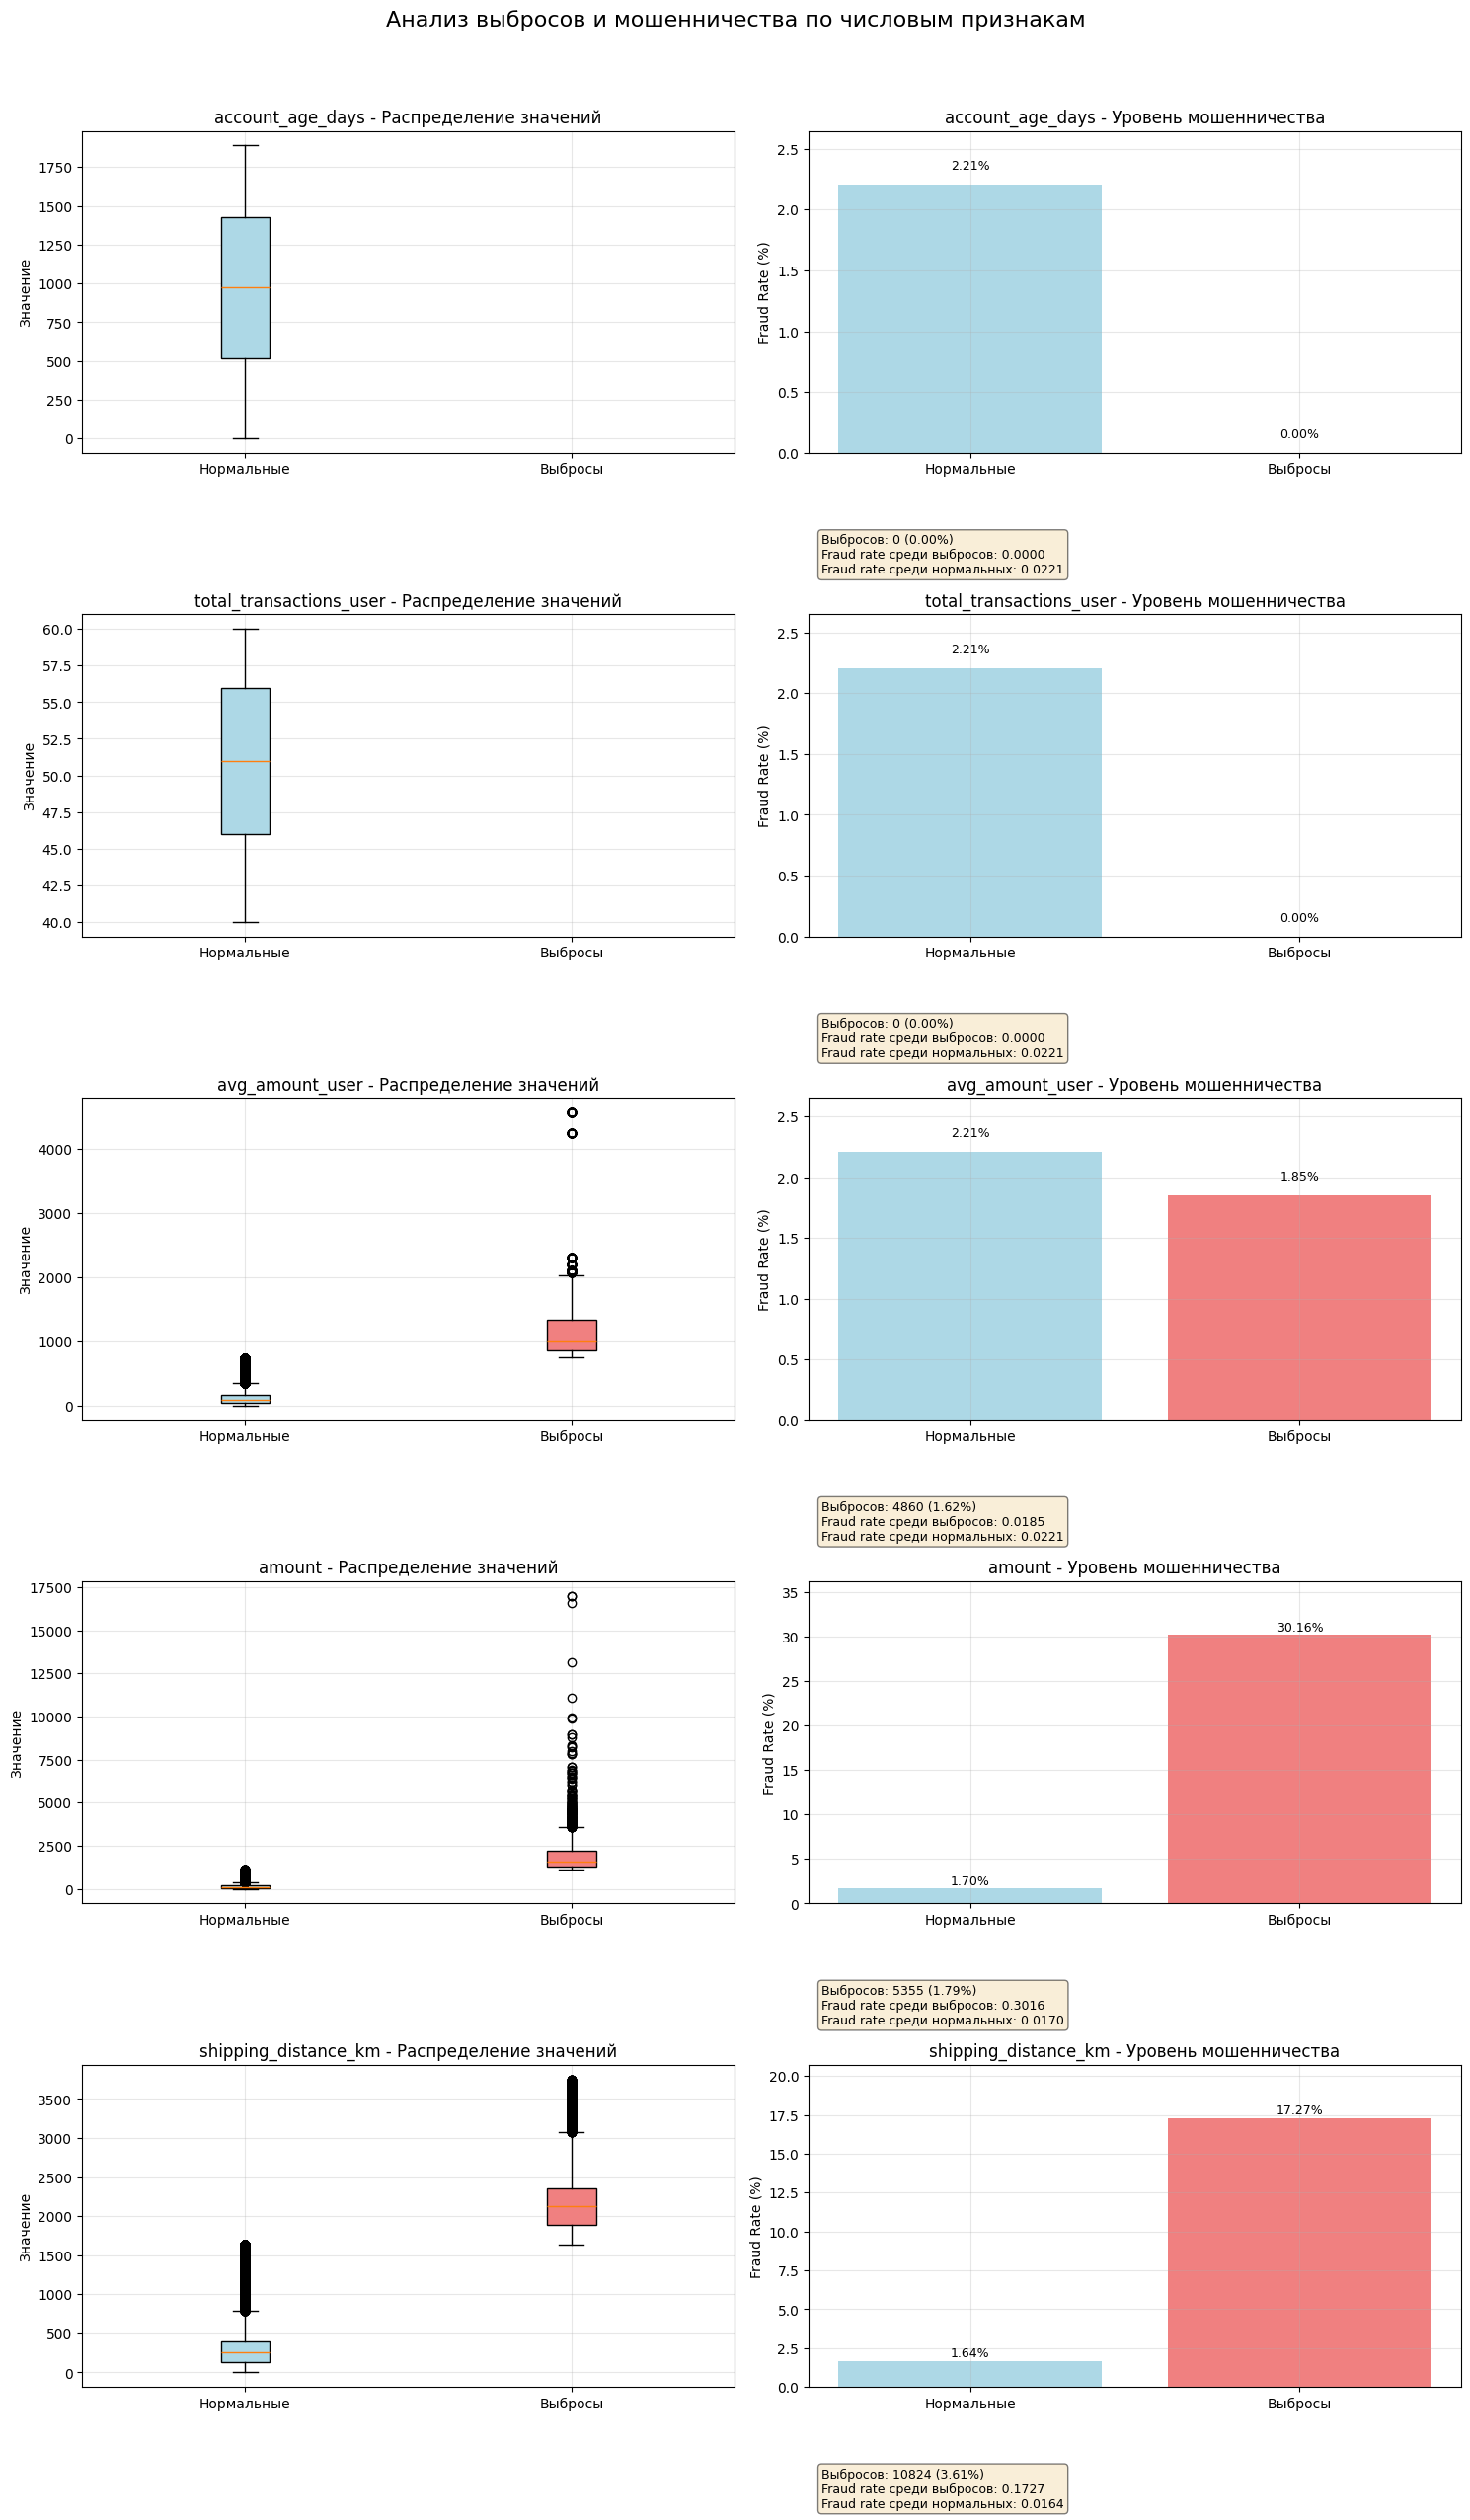


СВОДНАЯ СТАТИСТИКА ПО ВЫБРОСАМ:
                Признак  Выбросов % выбросов Fraud rate (выбросы) Fraud rate (норма) Разница
       account_age_days         0      0.00%               0.0000             0.0221 -0.0221
total_transactions_user         0      0.00%               0.0000             0.0221 -0.0221
        avg_amount_user      4860      1.62%               0.0185             0.0221 -0.0036
                 amount      5355      1.79%               0.3016             0.0170  0.2846
   shipping_distance_km     10824      3.61%               0.1727             0.0164  0.1563


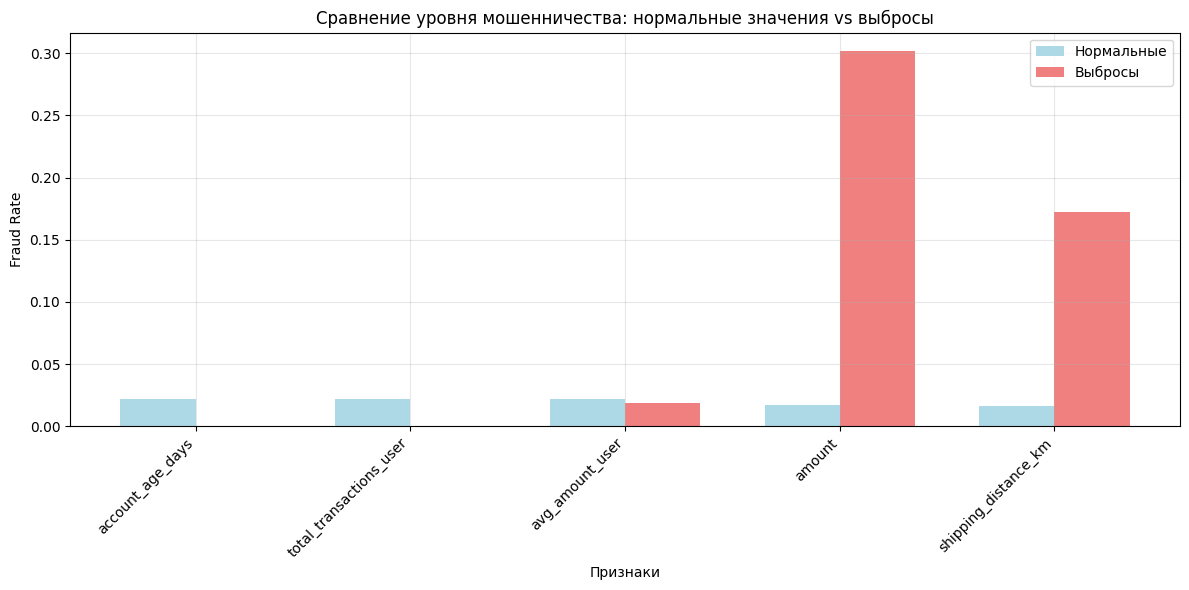

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Числовые признаки
num_cols = ['account_age_days', 'total_transactions_user', 'avg_amount_user',
            'amount', 'shipping_distance_km']

def detect_outliers_zscore(df, column, threshold=3):
    std = df[column].std()
    if std < 1e-6:
        return pd.Series(False, index=df.index), None
    mean = df[column].mean()
    z_scores = np.abs((df[column] - mean) / std)
    outliers_mask = z_scores > threshold
    return outliers_mask, z_scores

# Создаем графики
fig, axes = plt.subplots(len(num_cols), 2, figsize=(15, 5*len(num_cols)))
fig.suptitle('Анализ выбросов и мошенничества по числовым признакам', fontsize=16, y=1.02)

zscore_outliers = {}

for idx, col in enumerate(num_cols):
    mask, z_scores = detect_outliers_zscore(df, col, threshold=3)
    zscore_outliers[col] = {
        'count': mask.sum(),
        'percent': mask.sum() / len(df) * 100,
        'fraud_rate_outliers': df.loc[mask, 'is_fraud'].mean() if mask.sum() > 0 else 0,
        'fraud_rate_normal': df.loc[~mask, 'is_fraud'].mean()
    }

    # Левый график: распределение значений с выделением выбросов
    ax1 = axes[idx, 0]

    # Нормальные значения
    normal_vals = df.loc[~mask, col]
    outlier_vals = df.loc[mask, col]

    # Боксплот
    bp = ax1.boxplot([normal_vals, outlier_vals], labels=['Нормальные', 'Выбросы'],
                     patch_artist=True)

    # Цвета
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][1].set_facecolor('lightcoral')

    ax1.set_title(f'{col} - Распределение значений')
    ax1.set_ylabel('Значение')
    ax1.grid(True, alpha=0.3)

    # Правый график: уровень мошенничества
    ax2 = axes[idx, 1]

    fraud_rates = [
        zscore_outliers[col]['fraud_rate_normal'] * 100,
        zscore_outliers[col]['fraud_rate_outliers'] * 100
    ]

    bars = ax2.bar(['Нормальные', 'Выбросы'], fraud_rates,
                   color=['lightblue', 'lightcoral'])
    ax2.set_title(f'{col} - Уровень мошенничества')
    ax2.set_ylabel('Fraud Rate (%)')
    ax2.set_ylim(0, max(fraud_rates) * 1.2 if max(fraud_rates) > 0 else 10)
    ax2.grid(True, alpha=0.3)

    # Добавляем значения на столбцы
    for bar, rate in zip(bars, fraud_rates):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{rate:.2f}%', ha='center', va='bottom', fontsize=9)

    # Статистика под графиками
    stats_text = f"Выбросов: {mask.sum()} ({mask.sum()/len(df)*100:.2f}%)\n"
    stats_text += f"Fraud rate среди выбросов: {zscore_outliers[col]['fraud_rate_outliers']:.4f}\n"
    stats_text += f"Fraud rate среди нормальных: {zscore_outliers[col]['fraud_rate_normal']:.4f}"

    ax2.text(0.02, -0.25, stats_text, transform=ax2.transAxes, fontsize=9,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# Дополнительно: таблица со статистикой
print("\n" + "="*80)
print("СВОДНАЯ СТАТИСТИКА ПО ВЫБРОСАМ:")
print("="*80)

summary_data = []
for col in num_cols:
    summary_data.append({
        'Признак': col,
        'Выбросов': zscore_outliers[col]['count'],
        '% выбросов': f"{zscore_outliers[col]['percent']:.2f}%",
        'Fraud rate (выбросы)': f"{zscore_outliers[col]['fraud_rate_outliers']:.4f}",
        'Fraud rate (норма)': f"{zscore_outliers[col]['fraud_rate_normal']:.4f}",
        'Разница': f"{zscore_outliers[col]['fraud_rate_outliers'] - zscore_outliers[col]['fraud_rate_normal']:.4f}"
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

# График сравнения уровня мошенничества
fig2, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(num_cols))
width = 0.35

fraud_normal = [zscore_outliers[col]['fraud_rate_normal'] for col in num_cols]
fraud_outliers = [zscore_outliers[col]['fraud_rate_outliers'] for col in num_cols]

bars1 = ax.bar(x - width/2, fraud_normal, width, label='Нормальные', color='lightblue')
bars2 = ax.bar(x + width/2, fraud_outliers, width, label='Выбросы', color='lightcoral')

ax.set_xlabel('Признаки')
ax.set_ylabel('Fraud Rate')
ax.set_title('Сравнение уровня мошенничества: нормальные значения vs выбросы')
ax.set_xticks(x)
ax.set_xticklabels(num_cols, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

###IQR

In [ ]:
def detect_outliers_iqr(df, column, k=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    outliers_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers_mask, lower_bound, upper_bound

iqr_outliers = {}
for col in num_cols:
    mask, lower, upper = detect_outliers_iqr(df, col)
    iqr_outliers[col] = {
        'count': mask.sum(),
        'percent': mask.sum() / len(df) * 100,
        'lower_bound': lower,
        'upper_bound': upper,
        'fraud_rate_outliers': df.loc[mask, 'is_fraud'].mean() if mask.sum() > 0 else 0,
        'fraud_rate_normal': df.loc[~mask, 'is_fraud'].mean()
    }
    print(f"{col}:")
    print(f"  Границы: [{lower:.2f}, {upper:.2f}]")
    print(f"  Выбросов: {mask.sum()} ({mask.sum()/len(df)*100:.2f}%)")
    print(f"  Fraud rate среди выбросов: {iqr_outliers[col]['fraud_rate_outliers']:.4f}")
    print(f"  Fraud rate среди нормальных: {iqr_outliers[col]['fraud_rate_normal']:.4f}")


account_age_days:
  Границы: [-847.50, 2788.50]
  Выбросов: 0 (0.00%)
  Fraud rate среди выбросов: 0.0000
  Fraud rate среди нормальных: 0.0221
total_transactions_user:
  Границы: [31.00, 71.00]
  Выбросов: 0 (0.00%)
  Fraud rate среди выбросов: 0.0000
  Fraud rate среди нормальных: 0.0221
avg_amount_user:
  Границы: [-144.70, 364.34]
  Выбросов: 23890 (7.97%)
  Fraud rate среди выбросов: 0.0252
  Fraud rate среди нормальных: 0.0218
amount:
  Границы: [-181.42, 414.63]
  Выбросов: 26711 (8.91%)
  Fraud rate среди выбросов: 0.0740
  Fraud rate среди нормальных: 0.0170
shipping_distance_km:
  Границы: [-272.27, 818.05]
  Выбросов: 20312 (6.78%)
  Fraud rate среди выбросов: 0.1281
  Fraud rate среди нормальных: 0.0144


/tmp/ipython-input-1430854763.py:61: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot([normal_vals], labels=['Нормальные значения'], patch_artist=True)
/tmp/ipython-input-1430854763.py:71: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()
/tmp/ipython-input-1430854763.py:61: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot([normal_vals], labels=['Нормальные значения'], patch_artist=True)
/tmp/ipython-input-1430854763.py:71: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no

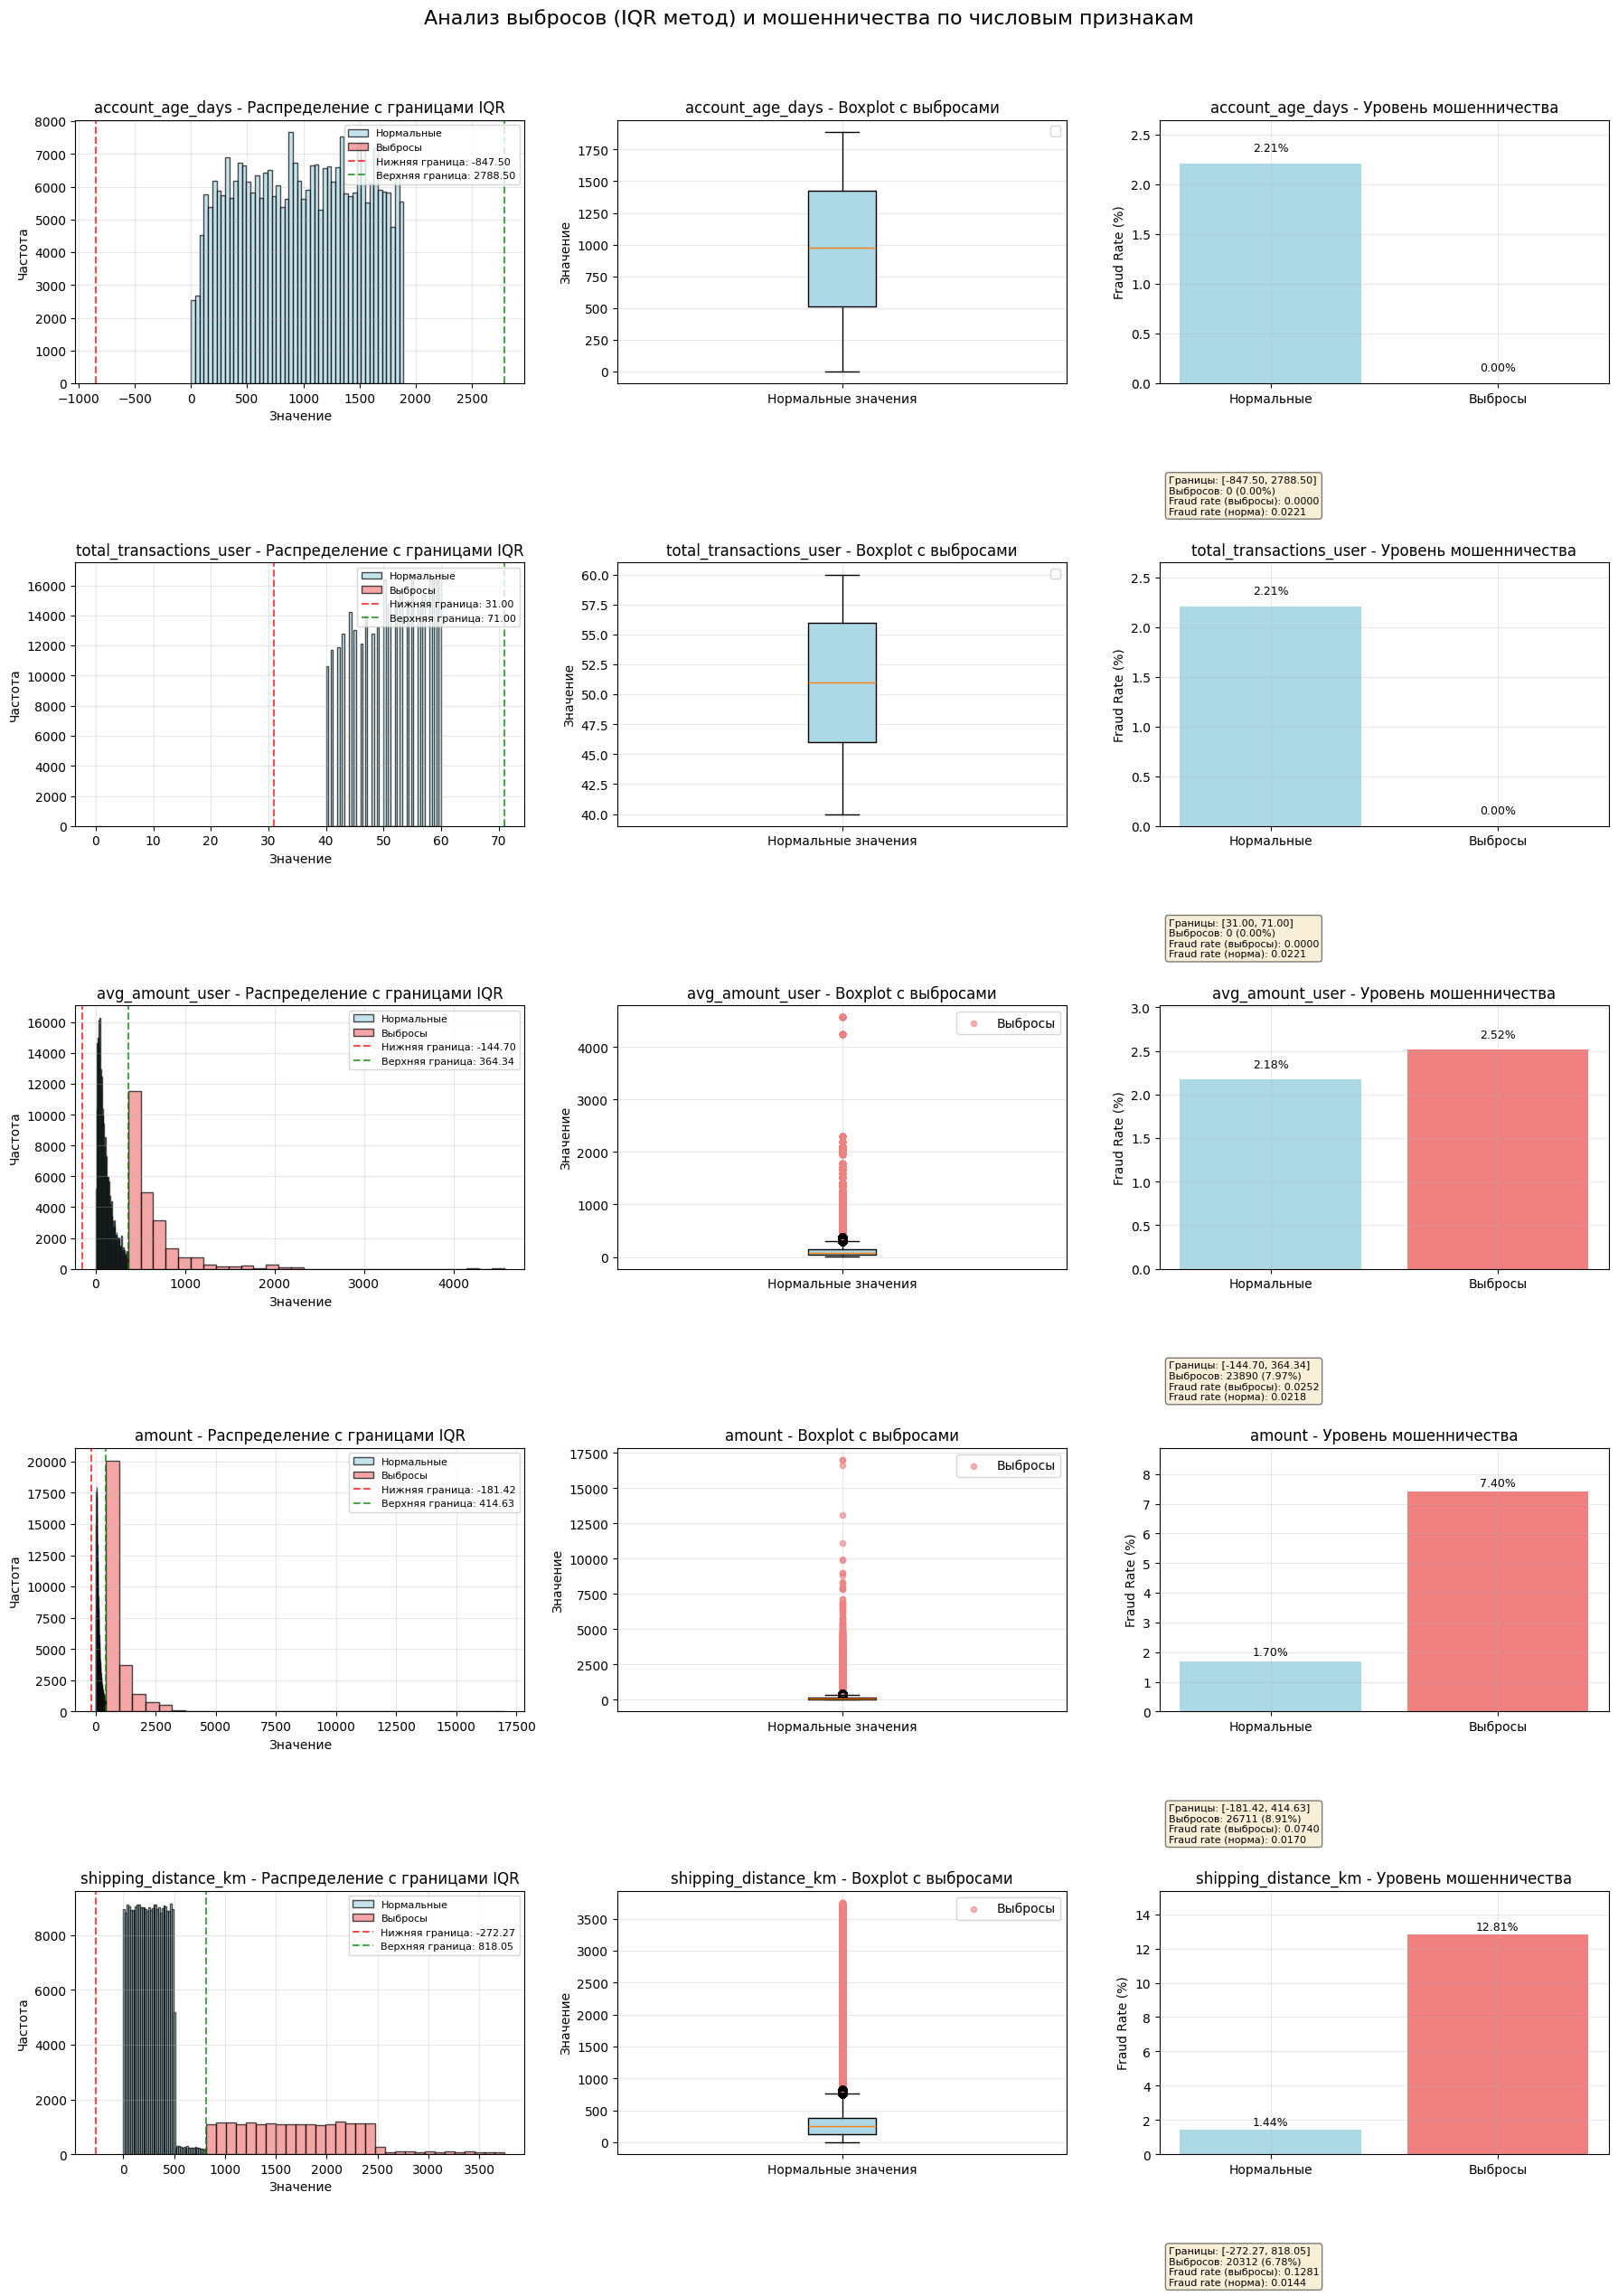


СВОДНАЯ СТАТИСТИКА ПО ВЫБРОСАМ (IQR МЕТОД):
                Признак Нижняя граница Верхняя граница  Выбросов % выбросов Fraud rate (выбросы) Fraud rate (норма) Разница
       account_age_days        -847.50         2788.50         0      0.00%               0.0000             0.0221 -0.0221
total_transactions_user          31.00           71.00         0      0.00%               0.0000             0.0221 -0.0221
        avg_amount_user        -144.70          364.34     23890      7.97%               0.0252             0.0218  0.0034
                 amount        -181.42          414.63     26711      8.91%               0.0740             0.0170  0.0570
   shipping_distance_km        -272.27          818.05     20312      6.78%               0.1281             0.0144  0.1137


/tmp/ipython-input-1430854763.py:156: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(num_cols, rotation=45, ha='right')


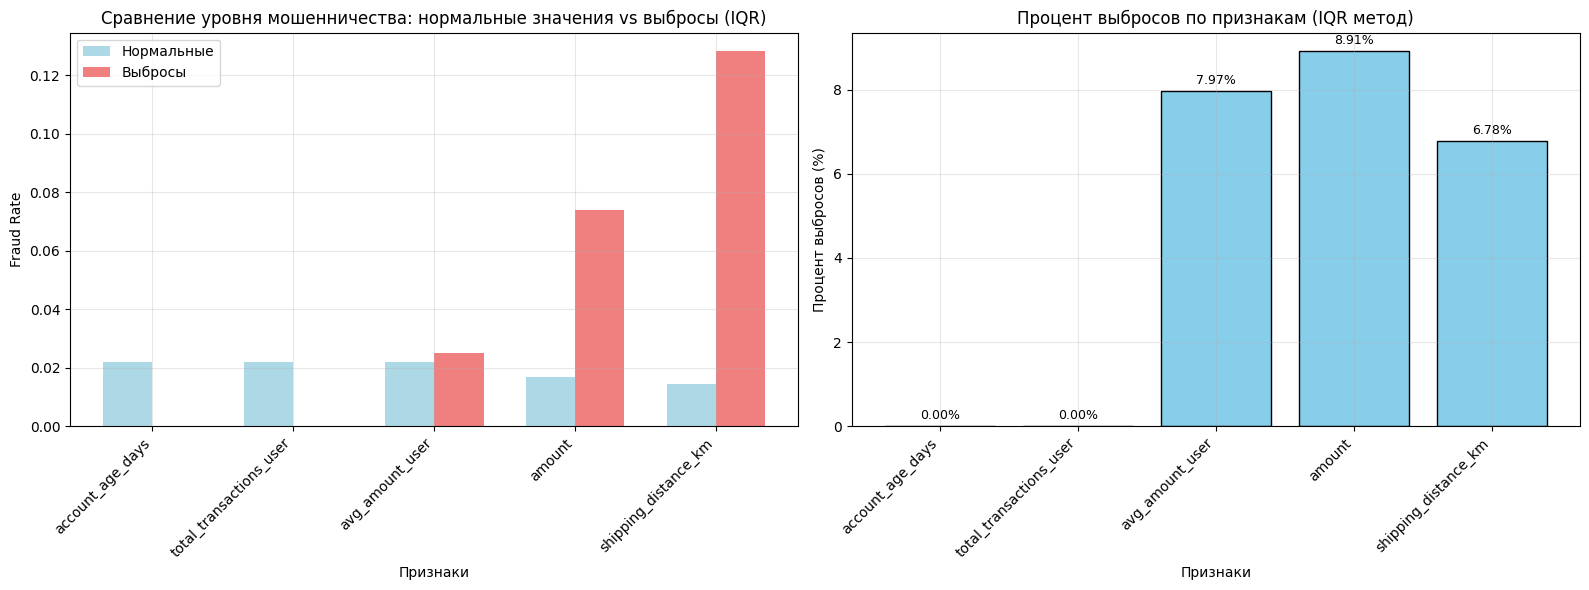

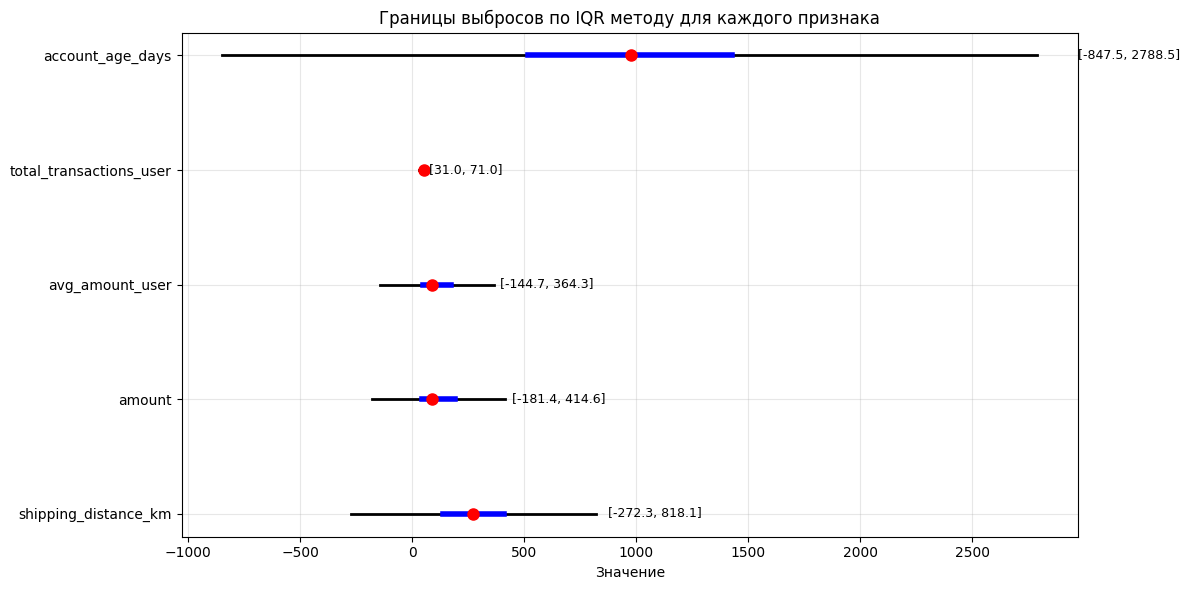

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Числовые признаки
num_cols = ['account_age_days', 'total_transactions_user', 'avg_amount_user',
            'amount', 'shipping_distance_km']

def detect_outliers_iqr(df, column, k=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    outliers_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers_mask, lower_bound, upper_bound

# Создаем графики
fig, axes = plt.subplots(len(num_cols), 3, figsize=(18, 5*len(num_cols)))
fig.suptitle('Анализ выбросов (IQR метод) и мошенничества по числовым признакам', fontsize=16, y=1.02)

iqr_outliers = {}

for idx, col in enumerate(num_cols):
    mask, lower, upper = detect_outliers_iqr(df, col)
    iqr_outliers[col] = {
        'count': mask.sum(),
        'percent': mask.sum() / len(df) * 100,
        'lower_bound': lower,
        'upper_bound': upper,
        'fraud_rate_outliers': df.loc[mask, 'is_fraud'].mean() if mask.sum() > 0 else 0,
        'fraud_rate_normal': df.loc[~mask, 'is_fraud'].mean()
    }

    # 1. Левый график: распределение значений с выделением выбросов и границами
    ax1 = axes[idx, 0]

    # Нормальные значения
    normal_vals = df.loc[~mask, col]
    outlier_vals = df.loc[mask, col]

    # Создаем гистограмму
    ax1.hist(normal_vals, bins=50, alpha=0.7, color='lightblue', label='Нормальные', edgecolor='black')
    ax1.hist(outlier_vals, bins=30, alpha=0.7, color='lightcoral', label='Выбросы', edgecolor='black')

    # Добавляем вертикальные линии для границ
    ax1.axvline(lower, color='red', linestyle='--', alpha=0.7, label=f'Нижняя граница: {lower:.2f}')
    ax1.axvline(upper, color='green', linestyle='--', alpha=0.7, label=f'Верхняя граница: {upper:.2f}')

    ax1.set_title(f'{col} - Распределение с границами IQR')
    ax1.set_xlabel('Значение')
    ax1.set_ylabel('Частота')
    ax1.legend(loc='upper right', fontsize=8)
    ax1.grid(True, alpha=0.3)

    # 2. Центральный график: boxplot с выбросами
    ax2 = axes[idx, 1]

    # Создаем boxplot
    bp = ax2.boxplot([normal_vals], labels=['Нормальные значения'], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')

    # Добавляем точки выбросов
    if len(outlier_vals) > 0:
        ax2.scatter([1]*len(outlier_vals), outlier_vals,
                   color='lightcoral', alpha=0.6, s=20, label='Выбросы')

    ax2.set_title(f'{col} - Boxplot с выбросами')
    ax2.set_ylabel('Значение')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # 3. Правый график: уровень мошенничества
    ax3 = axes[idx, 2]

    fraud_rates = [
        iqr_outliers[col]['fraud_rate_normal'] * 100,
        iqr_outliers[col]['fraud_rate_outliers'] * 100
    ]

    bars = ax3.bar(['Нормальные', 'Выбросы'], fraud_rates,
                   color=['lightblue', 'lightcoral'])
    ax3.set_title(f'{col} - Уровень мошенничества')
    ax3.set_ylabel('Fraud Rate (%)')
    ax3.set_ylim(0, max(fraud_rates) * 1.2 if max(fraud_rates) > 0 else 10)
    ax3.grid(True, alpha=0.3)

    # Добавляем значения на столбцы
    for bar, rate in zip(bars, fraud_rates):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{rate:.2f}%', ha='center', va='bottom', fontsize=9)

    # Статистика под графиками
    stats_text = f"Границы: [{lower:.2f}, {upper:.2f}]\n"
    stats_text += f"Выбросов: {mask.sum()} ({mask.sum()/len(df)*100:.2f}%)\n"
    stats_text += f"Fraud rate (выбросы): {iqr_outliers[col]['fraud_rate_outliers']:.4f}\n"
    stats_text += f"Fraud rate (норма): {iqr_outliers[col]['fraud_rate_normal']:.4f}"

    ax3.text(0.02, -0.35, stats_text, transform=ax3.transAxes, fontsize=8,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# Дополнительно: таблица со статистикой
print("\n" + "="*100)
print("СВОДНАЯ СТАТИСТИКА ПО ВЫБРОСАМ (IQR МЕТОД):")
print("="*100)

summary_data = []
for col in num_cols:
    summary_data.append({
        'Признак': col,
        'Нижняя граница': f"{iqr_outliers[col]['lower_bound']:.2f}",
        'Верхняя граница': f"{iqr_outliers[col]['upper_bound']:.2f}",
        'Выбросов': iqr_outliers[col]['count'],
        '% выбросов': f"{iqr_outliers[col]['percent']:.2f}%",
        'Fraud rate (выбросы)': f"{iqr_outliers[col]['fraud_rate_outliers']:.4f}",
        'Fraud rate (норма)': f"{iqr_outliers[col]['fraud_rate_normal']:.4f}",
        'Разница': f"{iqr_outliers[col]['fraud_rate_outliers'] - iqr_outliers[col]['fraud_rate_normal']:.4f}"
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

# График сравнения уровня мошенничества для всех признаков
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 1. Уровень мошенничества по всем признакам
x = np.arange(len(num_cols))
width = 0.35

fraud_normal = [iqr_outliers[col]['fraud_rate_normal'] for col in num_cols]
fraud_outliers = [iqr_outliers[col]['fraud_rate_outliers'] for col in num_cols]

bars1 = ax1.bar(x - width/2, fraud_normal, width, label='Нормальные', color='lightblue')
bars2 = ax1.bar(x + width/2, fraud_outliers, width, label='Выбросы', color='lightcoral')

ax1.set_xlabel('Признаки')
ax1.set_ylabel('Fraud Rate')
ax1.set_title('Сравнение уровня мошенничества: нормальные значения vs выбросы (IQR)')
ax1.set_xticks(x)
ax1.set_xticklabels(num_cols, rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Процент выбросов по признакам
percent_outliers = [iqr_outliers[col]['percent'] for col in num_cols]
bars3 = ax2.bar(num_cols, percent_outliers, color='skyblue', edgecolor='black')

ax2.set_xlabel('Признаки')
ax2.set_ylabel('Процент выбросов (%)')
ax2.set_title('Процент выбросов по признакам (IQR метод)')
ax2.set_xticklabels(num_cols, rotation=45, ha='right')
ax2.grid(True, alpha=0.3)

# Добавляем значения на столбцы
for bar, percent in zip(bars3, percent_outliers):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{percent:.2f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Дополнительный график: границы IQR для каждого признака
fig3, ax = plt.subplots(figsize=(12, 6))

# Создаем "усы" для каждого признака
for idx, col in enumerate(num_cols):
    y_pos = idx
    lower = iqr_outliers[col]['lower_bound']
    upper = iqr_outliers[col]['upper_bound']

    # Рисуем линию от нижней до верхней границы
    ax.plot([lower, upper], [y_pos, y_pos], 'k-', linewidth=2)

    # Рисуем прямоугольник для IQR (от Q1 до Q3)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    ax.plot([Q1, Q3], [y_pos, y_pos], color='blue', linewidth=4)

    # Добавляем точку для медианы
    median = df[col].median()
    ax.plot(median, y_pos, 'ro', markersize=8)

    # Добавляем текст со статистикой
    ax.text(upper + (upper - lower)*0.05, y_pos,
            f'[{lower:.1f}, {upper:.1f}]', va='center', fontsize=9)

ax.set_yticks(range(len(num_cols)))
ax.set_yticklabels(num_cols)
ax.set_xlabel('Значение')
ax.set_title('Границы выбросов по IQR методу для каждого признака')
ax.grid(True, alpha=0.3)
ax.invert_yaxis()  # Чтобы первый признак был сверху

plt.tight_layout()
plt.show()

### Тест Граббса

In [ ]:
def grubbs_test(data, alpha=0.05):
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    abs_deviation = np.abs(data - mean)
    max_idx = np.argmax(abs_deviation)
    G = abs_deviation[max_idx] / std
    t_crit = stats.t.ppf(1 - alpha / (2 * n), n - 2)
    G_crit = ((n - 1) / np.sqrt(n)) * np.sqrt(t_crit**2 / (n - 2 + t_crit**2))

    return G > G_crit, max_idx, G, G_crit
for col in ['amount', 'shipping_distance_km']:
    print(f"\n{col}:")
    data = df[col].values.copy()
    grubbs_outliers_count = 0
    for i in range(100):
        is_outlier, idx, G, G_crit = grubbs_test(data)
        if is_outlier:
            grubbs_outliers_count += 1
            data = np.delete(data, idx)
        else:
            break
    print(f"  Найдено выбросов по тесту Граббса: {grubbs_outliers_count}")



amount:
  Найдено выбросов по тесту Граббса: 100

shipping_distance_km:
  Найдено выбросов по тесту Граббса: 100


Итоги

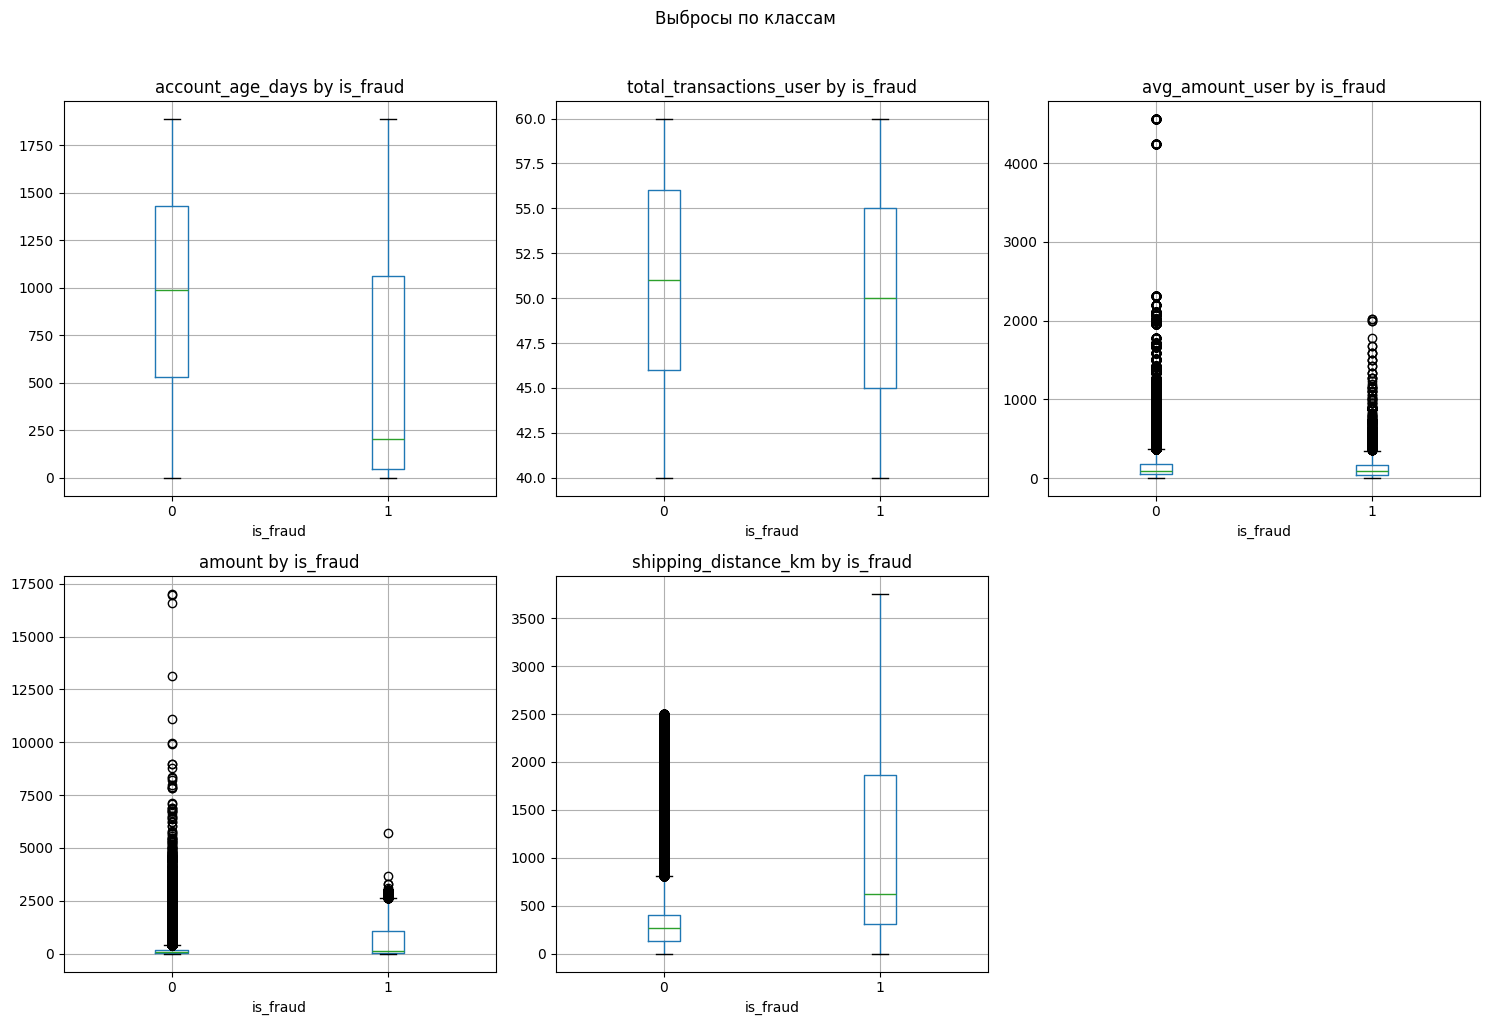

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    ax = axes[i]
    df.boxplot(column=col, by='is_fraud', ax=ax)
    ax.set_title(f'{col} by is_fraud')
    ax.set_xlabel('is_fraud')
axes[-1].axis('off')
plt.suptitle('Выбросы по классам', y=1.02)
plt.tight_layout()
plt.show()

## Построение признаков  на основе аномалий

In [ ]:
# Z-score
for col in num_cols:
    mask, _ = detect_outliers_zscore(df, col, threshold=3)
    df[f'is_outlier_zscore_{col}'] = mask.astype(int)
# IQR
for col in num_cols:
    mask, _, _ = detect_outliers_iqr(df, col)
    df[f'is_outlier_iqr_{col}'] = mask.astype(int)

# Счетчик аномалий
df['outlier_count_zscore'] = sum(df[f'is_outlier_zscore_{col}'] for col in num_cols)
df['outlier_count_iqr'] = sum(df[f'is_outlier_iqr_{col}'] for col in num_cols)

# Расстояние до медианы (нормализованное)
for col in num_cols:
    median = df[col].median()
    mad = np.median(np.abs(df[col] - median))
    df[f'mad_distance_{col}'] = np.abs(df[col] - median) / (mad + 1e-6)
print("Созданные признаки на основе аномалий:")
anomaly_features = [c for c in df.columns if 'outlier' in c or 'mad_distance' in c]
print(anomaly_features)

# Проверка корреляции новых признаков с целевой переменной
print("Корреляция признаков аномалий с is_fraud:")
for feat in anomaly_features:
    corr = df[feat].corr(df['is_fraud'])
    print(f"  {feat}: {corr:.4f}")

Созданные признаки на основе аномалий:
['is_outlier_zscore_account_age_days', 'is_outlier_zscore_total_transactions_user', 'is_outlier_zscore_avg_amount_user', 'is_outlier_zscore_amount', 'is_outlier_zscore_shipping_distance_km', 'is_outlier_iqr_account_age_days', 'is_outlier_iqr_total_transactions_user', 'is_outlier_iqr_avg_amount_user', 'is_outlier_iqr_amount', 'is_outlier_iqr_shipping_distance_km', 'outlier_count_zscore', 'outlier_count_iqr', 'mad_distance_account_age_days', 'mad_distance_total_transactions_user', 'mad_distance_avg_amount_user', 'mad_distance_amount', 'mad_distance_shipping_distance_km']
Корреляция признаков аномалий с is_fraud:
  is_outlier_zscore_account_age_days: nan
  is_outlier_zscore_total_transactions_user: nan
  is_outlier_zscore_avg_amount_user: -0.0031
  is_outlier_zscore_amount: 0.2567
  is_outlier_zscore_shipping_distance_km: 0.1985
  is_outlier_iqr_account_age_days: nan
  is_outlier_iqr_total_transactions_user: nan
  is_outlier_iqr_avg_amount_user: 0.00

## ML-методы для поиска сложных выбросов

### Isolation Forest

In [ ]:
X_anomaly = df[num_cols].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_anomaly)
iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.05,
    random_state=42,
    n_jobs=-1
)
df['anomaly_iforest'] = iso_forest.fit_predict(X_scaled)
df['anomaly_score_iforest'] = iso_forest.decision_function(X_scaled)
# -1 -> 1 (аномалия), 1 -> 0 (норма)
df['anomaly_iforest'] = (df['anomaly_iforest'] == -1).astype(int)
print(f"Найдено аномалий: {df['anomaly_iforest'].sum()}")
print(f"Fraud rate среди аномалий: {df[df['anomaly_iforest']==1]['is_fraud'].mean():.4f}")
print(f"Fraud rate среди нормальных: {df[df['anomaly_iforest']==0]['is_fraud'].mean():.4f}")


Найдено аномалий: 14985
Fraud rate среди аномалий: 0.2003
Fraud rate среди нормальных: 0.0127


### LOF

In [ ]:
lof = LocalOutlierFactor(
    n_neighbors=20,
    contamination=0.05,
    novelty=False,
    n_jobs=-1
)
df['anomaly_lof'] = lof.fit_predict(X_scaled)
df['anomaly_score_lof'] = -lof.negative_outlier_factor_
df['anomaly_lof'] = (df['anomaly_lof'] == -1).astype(int)
print(f"Найдено аномалий: {df['anomaly_lof'].sum()}")
print(f"Fraud rate среди аномалий: {df[df['anomaly_lof']==1]['is_fraud'].mean():.4f}")
print(f"Fraud rate среди нормальных: {df[df['anomaly_lof']==0]['is_fraud'].mean():.4f}")


Найдено аномалий: 14985
Fraud rate среди аномалий: 0.1064
Fraud rate среди нормальных: 0.0176


### One-Class SVM

In [ ]:
# На подвыборке из-за вычислительной сложности
sample_size = min(50000, len(df))
sample_idx = np.random.choice(len(df), sample_size, replace=False)
X_sample = X_scaled[sample_idx]

ocsvm = OneClassSVM(
    kernel='rbf',
    gamma='scale',
    nu=0.05
)
ocsvm_pred = ocsvm.fit_predict(X_sample)
df['anomaly_ocsvm'] = 0
df.iloc[sample_idx, df.columns.get_loc('anomaly_ocsvm')] = (ocsvm_pred == -1).astype(int)
print(f"(на выборке {sample_size}) найдено аномалий: {df['anomaly_ocsvm'].sum()}")


(на выборке 50000) найдено аномалий: 2499


### Elliptic Envelope

In [ ]:
try:
    ee = EllipticEnvelope(
        contamination=0.05,
        random_state=42 )
    df['anomaly_ee'] = ee.fit_predict(X_scaled)
    df['anomaly_ee'] = (df['anomaly_ee'] == -1).astype(int)
    print(f"Elliptic Envelope - найдено аномалий: {df['anomaly_ee'].sum()}")
    print(f"Fraud rate среди аномалий: {df[df['anomaly_ee']==1]['is_fraud'].mean():.4f}")
except Exception as e:
    print(f"Elliptic Envelope не сработал: {e}")
    df['anomaly_ee'] = 0


Elliptic Envelope - найдено аномалий: 14985
Fraud rate среди аномалий: 0.1836


### Сравнение четырех алгоритмов

In [ ]:
for method in ['anomaly_iforest', 'anomaly_lof', 'anomaly_ocsvm', 'anomaly_ee']:
    if df[method].sum() > 0:
        precision = df[df[method]==1]['is_fraud'].mean()
        recall = df[df['is_fraud']==1][method].mean()
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        print(f"\n{method}:")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1-score: {f1:.4f}")

df['anomaly_consensus'] = (
    df['anomaly_iforest'] +
    df['anomaly_lof'] +
    df['anomaly_ocsvm'] +
    df['anomaly_ee']
)
df['is_strong_anomaly'] = (df['anomaly_consensus'] >= 2).astype(int)
print(f"\nСильные аномалии (>=2 методов): {df['is_strong_anomaly'].sum()}")
print(f"Fraud rate среди сильных аномалий: {df[df['is_strong_anomaly']==1]['is_fraud'].mean():.4f}")



anomaly_iforest:
  Precision: 0.2003
  Recall: 0.4540
  F1-score: 0.2780

anomaly_lof:
  Precision: 0.1064
  Recall: 0.2411
  F1-score: 0.1476

anomaly_ocsvm:
  Precision: 0.2249
  Recall: 0.0850
  F1-score: 0.1234

anomaly_ee:
  Precision: 0.1836
  Recall: 0.4161
  F1-score: 0.2548

Сильные аномалии (>=2 методов): 11808
Fraud rate среди сильных аномалий: 0.2376


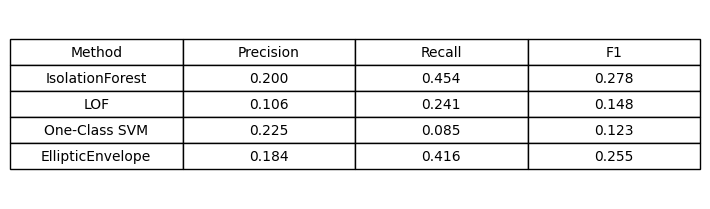

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

metrics = pd.DataFrame({
    "Method": ["IsolationForest", "LOF", "One-Class SVM", "EllipticEnvelope"],
    "Precision": [0.2003, 0.1064, 0.2249, 0.1836],
    "Recall":    [0.4540, 0.2411, 0.0850, 0.4161],
    "F1":        [0.2780, 0.1476, 0.1234, 0.2548],
})

fig, ax = plt.subplots(figsize=(7.2, 2.2))
ax.axis("off")

cell_text = [[m, f"{p:.3f}", f"{r:.3f}", f"{f1:.3f}"]
             for m, p, r, f1 in metrics[["Method","Precision","Recall","F1"]].values]

table = ax.table(
    cellText=cell_text,
    colLabels=["Method", "Precision", "Recall", "F1"],
    cellLoc="center",
    colLoc="center",
    loc="center"
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.4)

plt.tight_layout()
plt.show()


## Генерация признаков и отбор переменных

### Обработка категориальных

In [ ]:
def target_encode_cv(df, column, target, n_folds=5, smoothing=10):
    global_mean = df[target].mean()
    encoded = pd.Series(index=df.index, dtype=float)
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    for train_idx, val_idx in kf.split(df):
        train_data = df.iloc[train_idx]
        agg = train_data.groupby(column)[target].agg(['mean', 'count'])
        smoothed_mean = (agg['mean'] * agg['count'] + global_mean * smoothing) / (agg['count'] + smoothing)
        encoded.iloc[val_idx] = df.iloc[val_idx][column].map(smoothed_mean).fillna(global_mean)
    return encoded
df['merchant_category_te'] = target_encode_cv(df, 'merchant_category', 'is_fraud')
print("Target Encoding для merchant_category:")
print(df.groupby('merchant_category')['merchant_category_te'].first())
df['country_te'] = target_encode_cv(df, 'country', 'is_fraud')
df['bin_country_te'] = target_encode_cv(df, 'bin_country', 'is_fraud')


Target Encoding для merchant_category:
merchant_category
electronics    0.022685
fashion        0.022023
gaming         0.021809
grocery        0.020229
travel         0.023319
Name: merchant_category_te, dtype: float64


In [ ]:
channel_dummies = pd.get_dummies(df['channel'], prefix='channel', drop_first=True)
df = pd.concat([df, channel_dummies], axis=1)
print("\nOne-Hot Encoding для channel:")
print(channel_dummies.columns.tolist())


One-Hot Encoding для channel:
['channel_web']


### Признаки, основанные на ближайших соседях

In [ ]:
print(df.columns)

Index(['transaction_id', 'user_id', 'account_age_days',
       'total_transactions_user', 'avg_amount_user', 'amount', 'country',
       'bin_country', 'channel', 'merchant_category', 'promo_used',
       'avs_match', 'cvv_result', 'three_ds_flag', 'transaction_time',
       'shipping_distance_km', 'is_fraud', 'date', 'hour', 'day_of_week',
       'is_weekend', 'is_cross_border', 'amount_over_avg', 'amount_diff_avg',
       'avs_cvv_3ds', 'security_score', 'is_outlier_zscore_account_age_days',
       'is_outlier_zscore_total_transactions_user',
       'is_outlier_zscore_avg_amount_user', 'is_outlier_zscore_amount',
       'is_outlier_zscore_shipping_distance_km',
       'is_outlier_iqr_account_age_days',
       'is_outlier_iqr_total_transactions_user',
       'is_outlier_iqr_avg_amount_user', 'is_outlier_iqr_amount',
       'is_outlier_iqr_shipping_distance_km', 'outlier_count_zscore',
       'outlier_count_iqr', 'mad_distance_account_age_days',
       'mad_distance_total_transactions_

In [ ]:
user_stats = df.groupby('user_id').agg({
    'amount': ['mean', 'std', 'max', 'min'],
    'shipping_distance_km': ['mean', 'std', 'max'],
    'is_fraud': ['mean', 'sum', 'count']
}).reset_index()

user_stats.columns = ['user_id',
                      'user_amount_mean', 'user_amount_std', 'user_amount_max', 'user_amount_min',
                      'user_dist_mean', 'user_dist_std', 'user_dist_max',
                      'user_fraud_rate', 'user_fraud_count', 'user_tx_count']

df = df.merge(user_stats, on='user_id', how='left')
df['amount_zscore_user'] = (df['amount'] - df['user_amount_mean']) / (df['user_amount_std'] + 1e-6)
df['dist_zscore_user'] = (df['shipping_distance_km'] - df['user_dist_mean']) / (df['user_dist_std'] + 1e-6)
merchant_stats = df.groupby('merchant_category').agg({
    'amount': ['mean', 'std', 'median'],
    'is_fraud': 'mean'
}).reset_index()
merchant_stats.columns = ['merchant_category',
                          'merchant_amount_mean', 'merchant_amount_std', 'merchant_amount_median',
                          'merchant_fraud_rate']
df = df.merge(merchant_stats, on='merchant_category', how='left')
df['amount_vs_merchant'] = df['amount'] / (df['merchant_amount_mean'] + 1e-6)
print("Созданные признаки на основе ближайших соседей:")
neighbor_features = ['user_amount_mean', 'user_amount_std', 'user_fraud_rate',
                    'amount_zscore_user', 'dist_zscore_user', 'amount_vs_merchant']
for f in neighbor_features:
    print(f"  {f}: corr with fraud = {df[f].corr(df['is_fraud']):.4f}")


Созданные признаки на основе ближайших соседей:
  user_amount_mean: corr with fraud = 0.0664
  user_amount_std: corr with fraud = 0.2601
  user_fraud_rate: corr with fraud = 0.4963
  amount_zscore_user: corr with fraud = 0.1146
  dist_zscore_user: corr with fraud = 0.1514
  amount_vs_merchant: corr with fraud = 0.2025


### Обработка временных признаков

In [ ]:
# Преобразуем transaction_time в datetime
df['transaction_time'] = pd.to_datetime(df['transaction_time'])
# Извлекаем временные компоненты
df['hour'] = df['transaction_time'].dt.hour
df['day_of_week'] = df['transaction_time'].dt.dayofweek
df['day_of_month'] = df['transaction_time'].dt.day
df['month'] = df['transaction_time'].dt.month
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)

# Синус иликосинус кодирование для циклических признаков
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['dow_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['dow_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# Признаки пиковых часов
df['is_night'] = ((df['hour'] >= 0) & (df['hour'] < 6)).astype(int)
df['is_business_hours'] = ((df['hour'] >= 9) & (df['hour'] < 18)).astype(int)
df['is_evening'] = ((df['hour'] >= 18) & (df['hour'] < 22)).astype(int)
print("Временные признаки и их корреляция с fraud:")
time_features = ['hour_sin', 'hour_cos', 'dow_sin', 'dow_cos', 'is_weekend',
                'is_night', 'is_business_hours', 'is_evening']
for f in time_features: print(f"  {f}: corr with fraud = {df[f].corr(df['is_fraud']):.4f}")


Временные признаки и их корреляция с fraud:
  hour_sin: corr with fraud = 0.0022
  hour_cos: corr with fraud = 0.0030
  dow_sin: corr with fraud = -0.0001
  dow_cos: corr with fraud = -0.0015
  is_weekend: corr with fraud = -0.0002
  is_night: corr with fraud = 0.0021
  is_business_hours: corr with fraud = -0.0031
  is_evening: corr with fraud = -0.0004


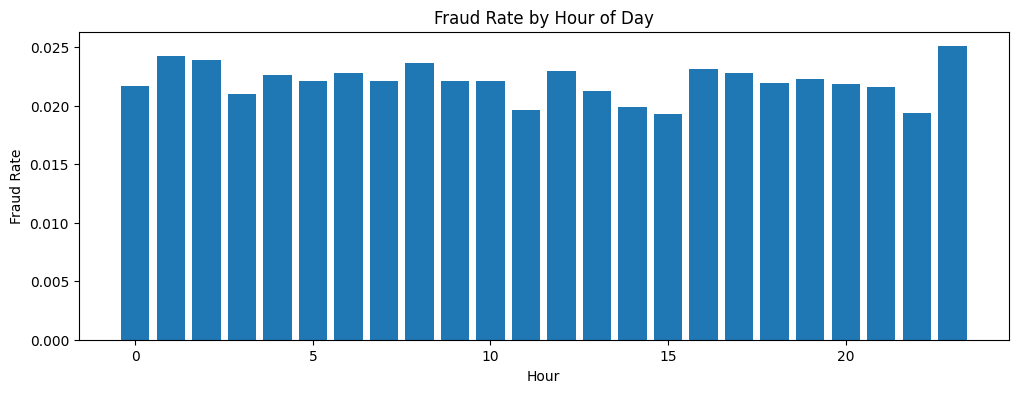

In [ ]:
fraud_by_hour = df.groupby('hour')['is_fraud'].mean()
plt.figure(figsize=(12, 4))
plt.bar(fraud_by_hour.index, fraud_by_hour.values)
plt.xlabel('Hour')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Hour of Day')
plt.show()

### Контекстные признаки

In [ ]:
# Несовпадение стран
df['is_cross_border'] = (df['country'] != df['bin_country']).astype(int)
# Комбинация проверок безопасности
df['security_score'] = df['avs_match'] + df['cvv_result'] + df['three_ds_flag']
df['all_security_passed'] = (df['security_score'] == 3).astype(int)
df['no_security'] = (df['security_score'] == 0).astype(int)
# Отношение суммы к среднему пользователя
df['amount_to_avg_ratio'] = df['amount'] / (df['avg_amount_user'] + 1e-6)
# Отклонение суммы от среднего
df['amount_diff_from_avg'] = df['amount'] - df['avg_amount_user']
# Признаки на основе shipping_distance
df['is_long_distance'] = (df['shipping_distance_km'] > df['shipping_distance_km'].quantile(0.9)).astype(int)
df['is_very_short_distance'] = (df['shipping_distance_km'] < df['shipping_distance_km'].quantile(0.1)).astype(int)
# Комбинированные рисковые признаки
df['risk_score'] = (
    df['is_cross_border'] * 3 +
    df['no_security'] * 2 +
    (1 - df['three_ds_flag']) * 1 +
    df['is_long_distance'] * 1 +
    df['is_night'] * 1
)
# Взаимодействия признаков
df['cross_border_high_amount'] = df['is_cross_border'] * (df['amount'] > df['amount'].quantile(0.9)).astype(int)
df['night_cross_border'] = df['is_night'] * df['is_cross_border']
df['no_security_high_amount'] = df['no_security'] * (df['amount'] > df['amount'].median()).astype(int)

print("Контекстные признаки и их корреляция с fraud:")
context_features = ['is_cross_border', 'security_score', 'all_security_passed', 'no_security',
                   'amount_to_avg_ratio', 'is_long_distance', 'risk_score',
                   'cross_border_high_amount', 'night_cross_border']
for f in context_features:
    print(f"  {f}: corr with fraud = {df[f].corr(df['is_fraud']):.4f}")


Контекстные признаки и их корреляция с fraud:
  is_cross_border: corr with fraud = 0.1811
  security_score: corr with fraud = -0.2559
  all_security_passed: corr with fraud = -0.1629
  no_security: corr with fraud = 0.2792
  amount_to_avg_ratio: corr with fraud = 0.2924
  is_long_distance: corr with fraud = 0.2550
  risk_score: corr with fraud = 0.2977
  cross_border_high_amount: corr with fraud = 0.1742
  night_cross_border: corr with fraud = 0.0856


## Отбор признаков

In [ ]:
feature_cols = [
    # Исходные числовые
    'account_age_days', 'total_transactions_user', 'avg_amount_user', 'amount', 'shipping_distance_km',
    # Бинарные исходные
    'promo_used', 'avs_match', 'cvv_result', 'three_ds_flag',
    # Target Encoding
    'merchant_category_te', 'country_te', 'bin_country_te',
    # Признаки аномалий
    'outlier_count_zscore', 'outlier_count_iqr', 'anomaly_iforest', 'anomaly_lof', 'anomaly_consensus',
    # Признаки ближайших соседей
    'user_amount_mean', 'user_amount_std', 'amount_zscore_user', 'dist_zscore_user', 'amount_vs_merchant',
    # Временные признаки
    'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos', 'is_weekend', 'is_night', 'is_business_hours',
    # Контекстные признаки
    'is_cross_border', 'security_score', 'all_security_passed', 'no_security',
    'amount_to_avg_ratio', 'amount_diff_from_avg', 'is_long_distance',
    'risk_score', 'cross_border_high_amount', 'night_cross_border', 'no_security_high_amount'
]

feature_cols = [f for f in feature_cols if f in df.columns]
print(f"\nВсего признаков для отбора: {len(feature_cols)}")



Всего признаков для отбора: 40


Отберем через корреляции:

In [ ]:
correlations = df[feature_cols + ['is_fraud']].corr()['is_fraud'].drop('is_fraud').abs().sort_values(ascending=False)
print("Топ-15 признаков по корреляции с целевой:")
print(correlations.head(15))

Топ-15 признаков по корреляции с целевой:
anomaly_consensus          0.312953
risk_score                 0.297724
amount_diff_from_avg       0.296393
amount_to_avg_ratio        0.292384
no_security                0.279227
anomaly_iforest            0.278436
shipping_distance_km       0.270004
user_amount_std            0.260066
security_score             0.255871
is_long_distance           0.255038
outlier_count_zscore       0.240547
avs_match                  0.223299
cvv_result                 0.218982
no_security_high_amount    0.205956
amount                     0.202499
Name: is_fraud, dtype: float64


### через Feature Importance(CatBoost)

In [ ]:
X = df[feature_cols].copy()
y = df['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Быстрая модель для оценки важности
cb_quick = CatBoostClassifier(
    iterations=100,
    depth=6,
    learning_rate=0.1,
    random_seed=42,
    verbose=0
)
cb_quick.fit(X_train, y_train)
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': cb_quick.feature_importances_
}).sort_values('importance', ascending=False)
print("Топ-20 признаков по важности CatBoost:")
print(feature_importance.head(20))


Топ-20 признаков по важности CatBoost:
                    feature  importance
36               risk_score   14.396426
4      shipping_distance_km   12.709568
0          account_age_days   10.875923
3                    amount    9.579748
30           security_score    8.209268
33      amount_to_avg_ratio    6.139687
6                 avs_match    6.046669
18          user_amount_std    5.571232
31      all_security_passed    4.555319
17         user_amount_mean    3.745729
29          is_cross_border    3.014816
34     amount_diff_from_avg    2.770426
16        anomaly_consensus    1.938290
20         dist_zscore_user    1.735765
5                promo_used    1.652135
2           avg_amount_user    1.345844
1   total_transactions_user    0.692481
22                 hour_sin    0.616805
23                 hour_cos    0.557722
19       amount_zscore_user    0.449462


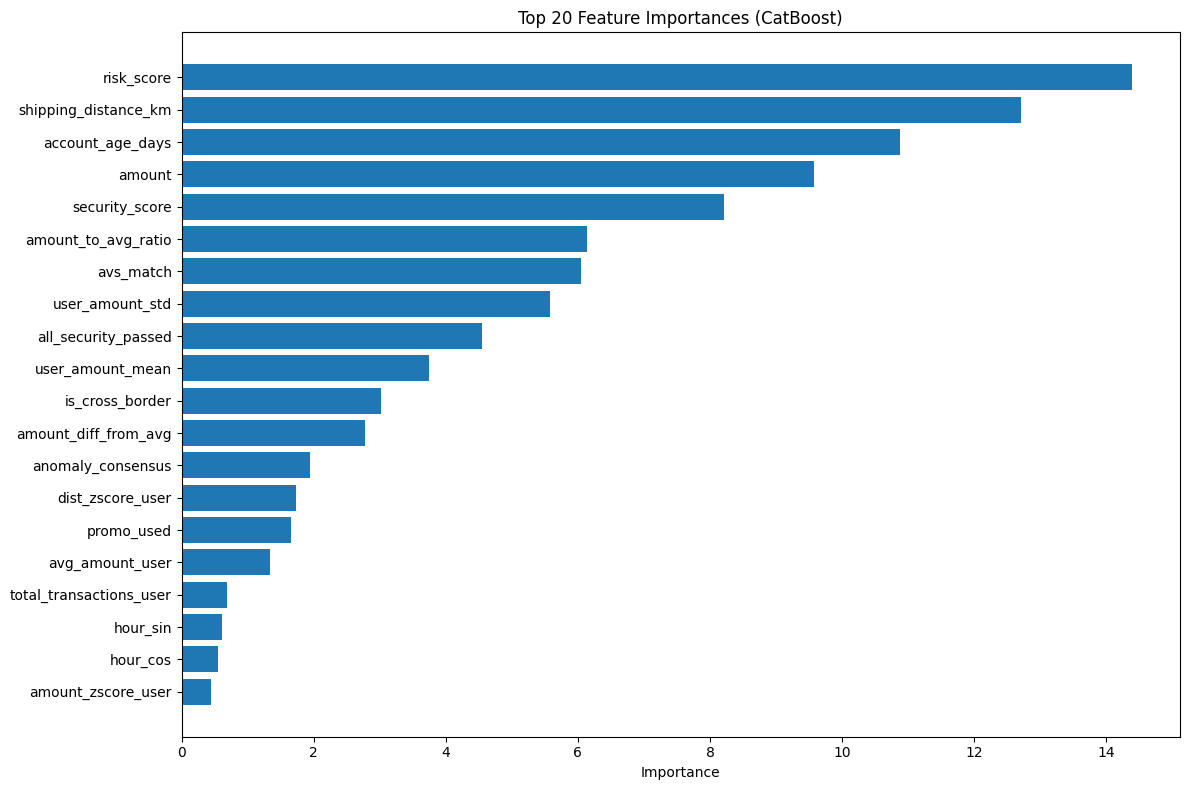

In [ ]:
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(20)
plt.barh(range(len(top_features)), top_features['importance'].values)
plt.yticks(range(len(top_features)), top_features['feature'].values)
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances (CatBoost)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### через L1-регуляризацию (Lasso)
удалил потому что ломает сессию и всё равно не используется

In [ ]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train.fillna(0))
# lasso = LogisticRegression(
#     penalty='l1',
#     solver='saga',
#     C=0.1,
#     max_iter=1000,
#     random_state=42
# )
# lasso.fit(X_train_scaled, y_train)
# lasso_importance = pd.DataFrame({
#     'feature': feature_cols,
#     'coef': np.abs(lasso.coef_[0])
# }).sort_values('coef', ascending=False)
# print("Признаки с ненулевыми коэффициентами L1:")
# print(lasso_importance[lasso_importance['coef'] > 0])


### Итоговый отбор

Возьмем через catboost

In [ ]:
selected_features = feature_importance.head(25)['feature'].tolist()
print(f"\nОтобрано {len(selected_features)} признаков:")
print(*selected_features)


Отобрано 25 признаков:
risk_score shipping_distance_km account_age_days amount security_score amount_to_avg_ratio avs_match user_amount_std all_security_passed user_amount_mean is_cross_border amount_diff_from_avg anomaly_consensus dist_zscore_user promo_used avg_amount_user total_transactions_user hour_sin hour_cos amount_zscore_user dow_sin is_long_distance country_te bin_country_te merchant_category_te


In [ ]:
# Исходные признаки (baseline)
baseline_features = [
    'account_age_days', 'total_transactions_user', 'avg_amount_user', 'amount',
    'shipping_distance_km', 'promo_used', 'avs_match', 'cvv_result', 'three_ds_flag',
    'is_cross_border', 'security_score', 'hour', 'day_of_week', 'is_weekend'
]
baseline_features = [f for f in baseline_features if f in df.columns]

# Модель baseline
print("\n--- Baseline модель ---")
X_base_train = df.loc[X_train.index, baseline_features]
X_base_test = df.loc[X_test.index, baseline_features]

cb_baseline = CatBoostClassifier(
    iterations=300,
    depth=6,
    learning_rate=0.1,
    random_seed=42,
    verbose=100,
    auto_class_weights='Balanced'
)
cb_baseline.fit(X_base_train, y_train, eval_set=(X_base_test, y_test), use_best_model=True)

y_pred_base = cb_baseline.predict(X_base_test)
y_pred_proba_base = cb_baseline.predict_proba(X_base_test)[:, 1]

print("\nBaseline метрики:")
print(classification_report(y_test, y_pred_base, target_names=['Legitimate', 'Fraud']))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba_base):.5f}")
print(f"PR AUC: {average_precision_score(y_test, y_pred_proba_base):.5f}")



--- Baseline модель ---
0:	learn: 0.5767894	test: 0.5757030	best: 0.5757030 (0)	total: 63.2ms	remaining: 18.9s
100:	learn: 0.1725647	test: 0.1842456	best: 0.1842333 (95)	total: 6.82s	remaining: 13.4s
200:	learn: 0.1493410	test: 0.1827813	best: 0.1816050 (175)	total: 15.2s	remaining: 7.48s
299:	learn: 0.1302623	test: 0.1863472	best: 0.1816050 (175)	total: 22s	remaining: 0us

bestTest = 0.1816050102
bestIteration = 175

Shrink model to first 176 iterations.

Baseline метрики:
              precision    recall  f1-score   support

  Legitimate       1.00      0.96      0.98     58617
       Fraud       0.31      0.89      0.46      1322

    accuracy                           0.95     59939
   macro avg       0.65      0.92      0.72     59939
weighted avg       0.98      0.95      0.96     59939

ROC AUC: 0.97380
PR AUC: 0.85610


In [ ]:
# Модель с новыми признаками
print("\n--- Модель с новыми признаками ---")
X_new_train = df.loc[X_train.index, selected_features]
X_new_test = df.loc[X_test.index, selected_features]

cb_new = CatBoostClassifier(
    iterations=300,
    depth=6,
    learning_rate=0.1,
    random_seed=42,
    verbose=100,
    auto_class_weights='Balanced'
)
cb_new.fit(X_new_train, y_train, eval_set=(X_new_test, y_test), use_best_model=True)

y_pred_new = cb_new.predict(X_new_test)
y_pred_proba_new = cb_new.predict_proba(X_new_test)[:, 1]

print("\nМетрики с новыми признаками:")
print(classification_report(y_test, y_pred_new, target_names=['Legitimate', 'Fraud']))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba_new):.5f}")
print(f"PR AUC: {average_precision_score(y_test, y_pred_proba_new):.5f}")



--- Модель с новыми признаками ---
0:	learn: 0.5754659	test: 0.5745528	best: 0.5745528 (0)	total: 189ms	remaining: 56.6s
100:	learn: 0.1635924	test: 0.1800753	best: 0.1800753 (100)	total: 9.31s	remaining: 18.3s
200:	learn: 0.1334883	test: 0.1816635	best: 0.1795958 (159)	total: 18.9s	remaining: 9.32s
299:	learn: 0.1091273	test: 0.1849799	best: 0.1795958 (159)	total: 28.5s	remaining: 0us

bestTest = 0.1795958371
bestIteration = 159

Shrink model to first 160 iterations.

Метрики с новыми признаками:
              precision    recall  f1-score   support

  Legitimate       1.00      0.96      0.98     58617
       Fraud       0.34      0.90      0.49      1322

    accuracy                           0.96     59939
   macro avg       0.67      0.93      0.73     59939
weighted avg       0.98      0.96      0.97     59939

ROC AUC: 0.97640
PR AUC: 0.85556


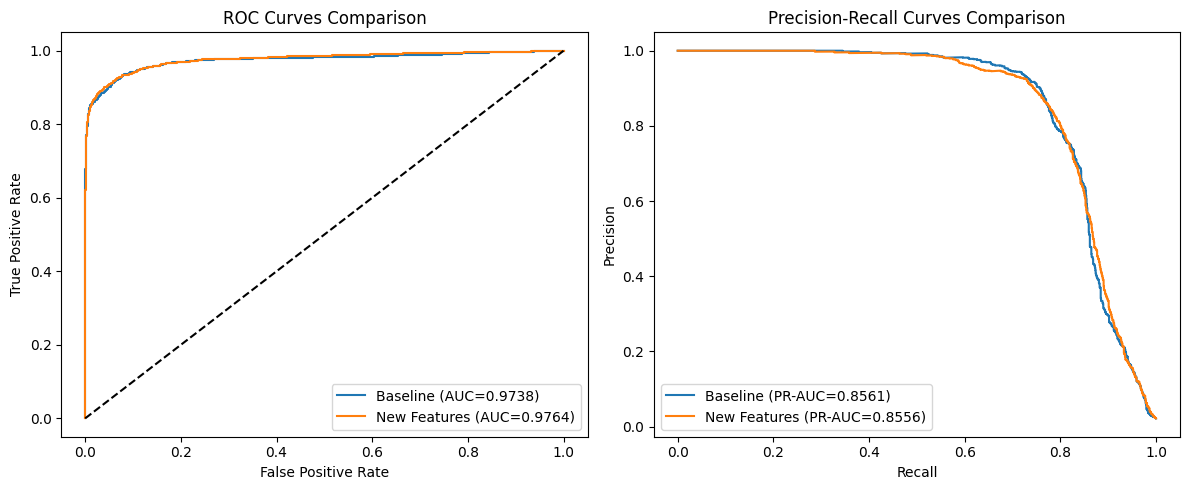

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
fpr_base, tpr_base, _ = roc_curve(y_test, y_pred_proba_base)
fpr_new, tpr_new, _ = roc_curve(y_test, y_pred_proba_new)
plt.plot(fpr_base, tpr_base, label=f'Baseline (AUC={roc_auc_score(y_test, y_pred_proba_base):.4f})')
plt.plot(fpr_new, tpr_new, label=f'New Features (AUC={roc_auc_score(y_test, y_pred_proba_new):.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()

plt.subplot(1, 2, 2)
precision_base, recall_base, _ = precision_recall_curve(y_test, y_pred_proba_base)
precision_new, recall_new, _ = precision_recall_curve(y_test, y_pred_proba_new)
plt.plot(recall_base, precision_base, label=f'Baseline (PR-AUC={average_precision_score(y_test, y_pred_proba_base):.4f})')
plt.plot(recall_new, precision_new, label=f'New Features (PR-AUC={average_precision_score(y_test, y_pred_proba_new):.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves Comparison')
plt.legend()

plt.tight_layout()
plt.show()


Результаты:
Улучшенили PR-AUC, отобрали 25 самых важных признаков

# Чекпоинт 3

## шаг 1

In [ ]:
!pip install lime shap shapflow umap-learn --quiet

In [ ]:
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

### shap

In [ ]:
shap.initjs()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_new_train)
X_test_scaled = scaler.transform(X_new_test)

In [ ]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_new_train.columns)

In [ ]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
explainer_cb = shap.TreeExplainer(cb_new)
shap_values_cb = explainer_cb.shap_values(X_new_test)

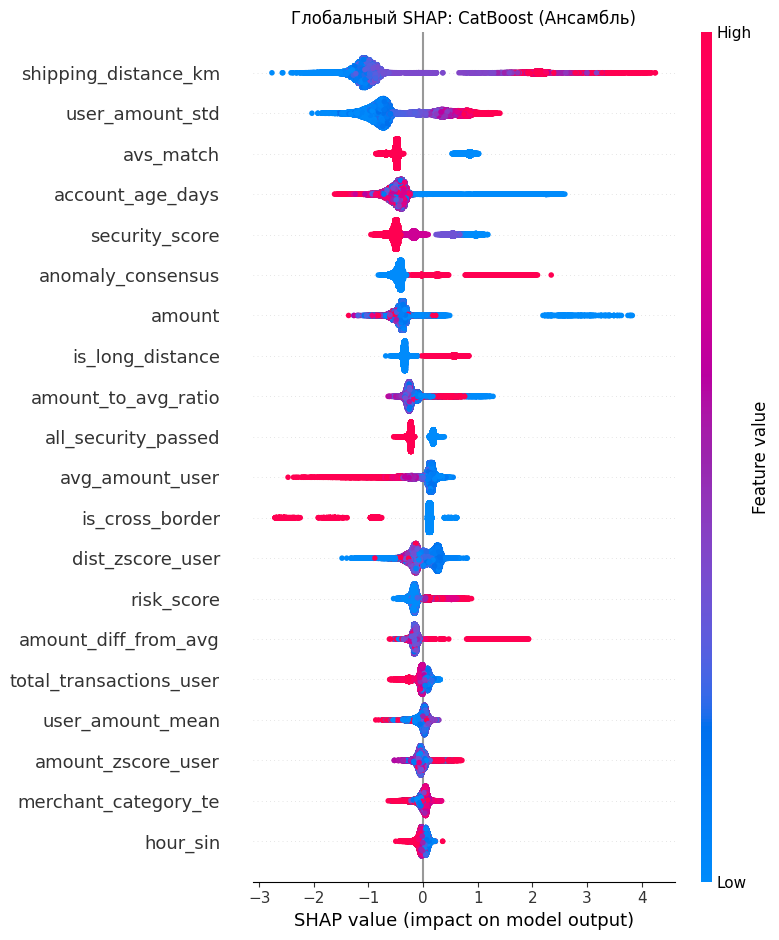

In [ ]:
plt.figure(figsize=(10, 5))
shap.summary_plot(shap_values_cb, X_new_test, show=False)
plt.title("Глобальный SHAP: CatBoost (Ансамбль)")
plt.tight_layout()
plt.show()

In [ ]:
explainer_linear = shap.LinearExplainer(log_reg, X_test_scaled_df)
shap_values_linear = explainer_linear.shap_values(X_test_scaled_df)

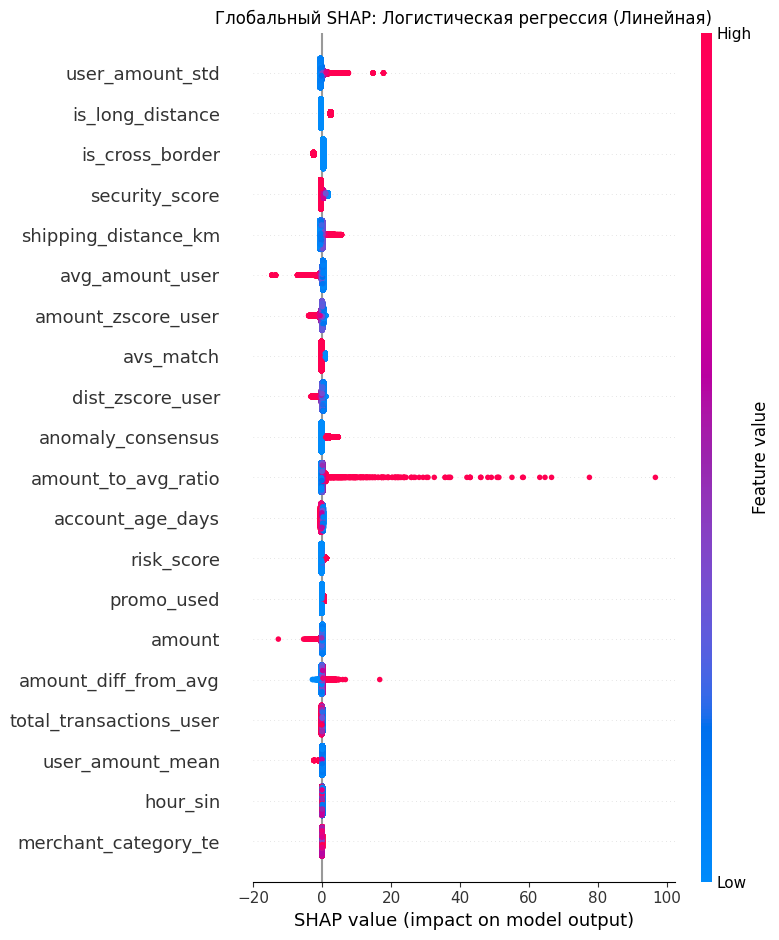

In [ ]:
plt.figure(figsize=(10, 5))
shap.summary_plot(shap_values_linear, X_test_scaled_df, show=False)
plt.title("Глобальный SHAP: Логистическая регрессия (Линейная)")
plt.tight_layout()
plt.show()

In [ ]:
fraud_idx = np.where(y_test == 1)[0][0]
print(f"Анализируем наблюдение с индексом: {fraud_idx} (Класс: Fraud)")

Анализируем наблюдение с индексом: 34 (Класс: Fraud)


Ключевые факторы риска совпадают (дистанция и аномальные суммы), но catboost  лучше улавливает тонкости, логично

### lime

In [ ]:
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_new_train.values,
    feature_names=X_new_train.columns.tolist(),
    class_names=['Legitimate', 'Fraud'],
    mode='classification',
    verbose=False
)

In [ ]:
exp = explainer_lime.explain_instance(
    data_row=X_new_test.values[fraud_idx],
    predict_fn=cb_new.predict_proba,
    num_features=10
)
exp.show_in_notebook(show_table=True)

In [ ]:
explainer_cb_obj = shap.Explainer(cb_new)
shap_values_obj = explainer_cb_obj(X_new_test)

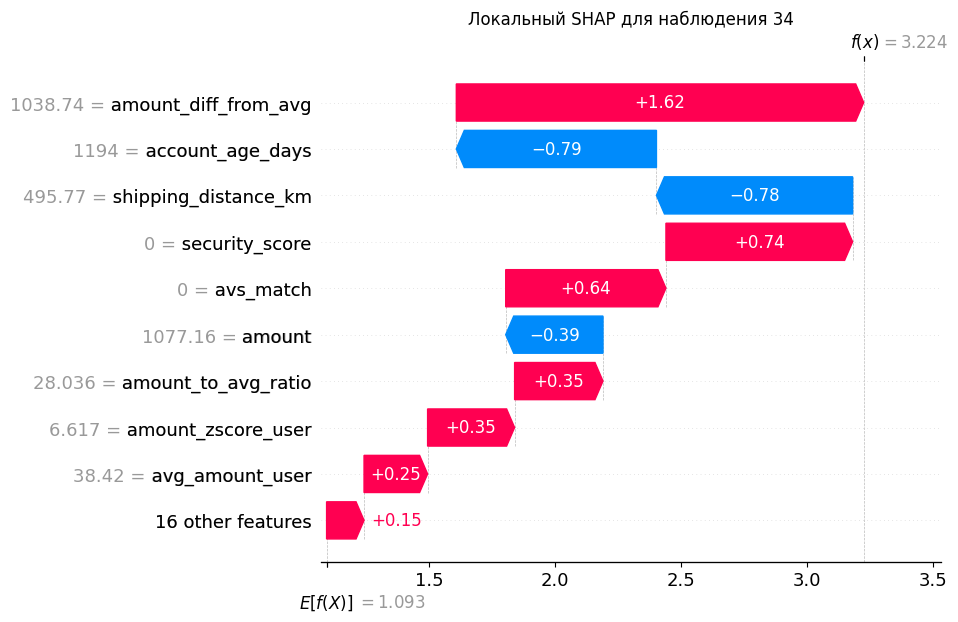

In [ ]:
plt.figure(figsize=(10, 6))
shap.plots.waterfall(shap_values_obj[fraud_idx], show=False)
plt.title(f"Локальный SHAP для наблюдения {fraud_idx}")
plt.show()

LIME выделил "абсолютные" значения, т е дистанцию, а SHAP показал, что для модели важнее было отклонение суммы от средней, нормально в целом, модели по разному работает, главное что вердикт один

In [ ]:
import lime.submodular_pick
import warnings
warnings.filterwarnings("ignore")

In [ ]:
X_lime_sample = X_new_test.sample(n=100, random_state=42)

In [ ]:
explainer_lime_global = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_new_train.values,
    feature_names=X_new_train.columns.tolist(),
    class_names=['Legitimate', 'Fraud'],
    mode='classification',
    verbose=False
)

In [ ]:
sp_obj = lime.submodular_pick.SubmodularPick(
    explainer_lime_global,
    X_lime_sample.values,
    cb_new.predict_proba,
    sample_size=100,
    num_features=5,
    num_exps_desired=5
)

In [ ]:
print("Топ5 типичных наблюдений описывающих логику модели в целом:")

for i, exp in enumerate(sp_obj.sp_explanations):
    print(f"\nПример #{i+1} (Глобальный представитель):")

    available_label = exp.top_labels[0]

    print(f"Объяснение для класса {available_label} ({'Fraud' if available_label==1 else 'Legitimate'}):")
    print(exp.as_list(label=available_label))

Топ5 типичных наблюдений описывающих логику модели в целом:

Пример #1 (Глобальный представитель):
Объяснение для класса 0 (Legitimate):
[('shipping_distance_km > 409.02', -0.4405918910523251), ('user_amount_std > 164.97', -0.11807497545540835), ('anomaly_consensus <= 0.00', 0.09520933448692134), ('is_cross_border <= 0.00', -0.06537681238582094), ('2.00 < security_score <= 3.00', 0.062206599444781824)]

Пример #2 (Глобальный представитель):
Объяснение для класса 0 (Legitimate):
[('shipping_distance_km <= 136.59', 0.16141556013613112), ('anomaly_consensus > 0.00', -0.09681149958342627), ('security_score <= 2.00', -0.06253780648970003), ('is_long_distance <= 0.00', 0.059865811106655765), ('30.40 < user_amount_std <= 65.89', 0.04550961069140856)]

Пример #3 (Глобальный представитель):
Объяснение для класса 0 (Legitimate):
[('136.59 < shipping_distance_km <= 273.00', 0.1602729811538057), ('anomaly_consensus <= 0.00', 0.10110053647181615), ('2.00 < security_score <= 3.00', 0.074167210558243

## шаг 2

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [ ]:
def get_shap_embeddings(model, X_data):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_data)

    if isinstance(shap_values, list):
        shap_values = shap_values[1]

    return pd.DataFrame(shap_values, columns=[f"shap_{c}" for c in X_data.columns], index=X_data.index)

In [ ]:
df_shap_train = get_shap_embeddings(cb_new, X_new_train)
df_shap_test = get_shap_embeddings(cb_new, X_new_test)

In [ ]:
iso = IsolationForest(contamination=0.01, random_state=42)
outliers = iso.fit_predict(df_shap_train)

X_train_clean = X_new_train[outliers == 1]
y_train_clean = y_train[outliers == 1]

print(f"Удалено выбросов: {len(X_new_train) - len(X_train_clean)}")

Удалено выбросов: 2398


In [ ]:
cb_clean = CatBoostClassifier(
    iterations=300,
    depth=6,
    learning_rate=0.1,
    random_seed=42,
    verbose=0,
    auto_class_weights='Balanced'
)
cb_clean.fit(X_train_clean, y_train_clean)

In [ ]:
auc_clean = roc_auc_score(y_test, cb_clean.predict_proba(X_new_test)[:, 1])
print(f"ROC AUC (После очистки): {auc_clean:.5f}")

ROC AUC (После очистки): 0.97340


In [ ]:
pca = PCA(n_components=2, random_state=42)
shap_pca = pca.fit_transform(df_shap_train)

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters_kmeans = kmeans.fit_predict(shap_pca)

In [ ]:
scaler = StandardScaler()
shap_scaled = scaler.fit_transform(df_shap_train)
dbscan = DBSCAN(eps=0.5, min_samples=100)
clusters_dbscan = dbscan.fit_predict(shap_scaled)
print(f"DBSCAN нашел {len(set(clusters_dbscan)) - 1} кластеров.")

DBSCAN нашел 0 кластеров.


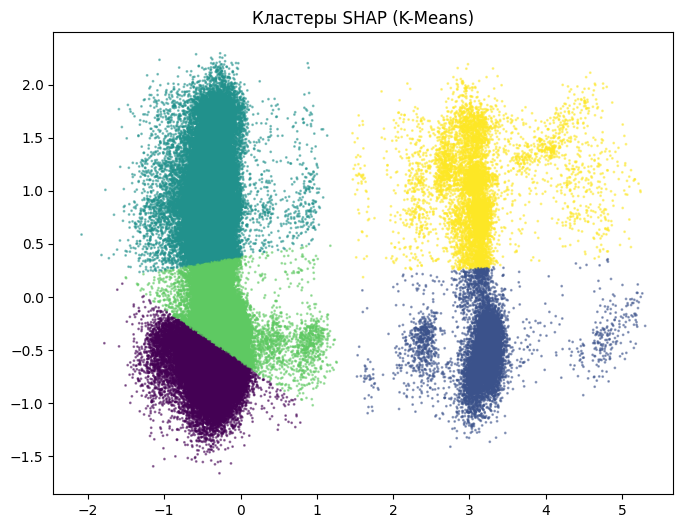

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(shap_pca[:, 0], shap_pca[:, 1], c=clusters_kmeans, cmap='viridis', s=1, alpha=0.5)
plt.title("Кластеры SHAP (K-Means)")
plt.show()

In [ ]:
X_train_clust = X_new_train.copy()
X_train_clust['cluster'] = clusters_kmeans

In [ ]:
shap_pca_test = pca.transform(df_shap_test)
X_test_clust = X_new_test.copy()
X_test_clust['cluster'] = kmeans.predict(shap_pca_test)

In [ ]:
cb_cluster = CatBoostClassifier(
    iterations=300,
    depth=6,
    learning_rate=0.1,
    random_seed=42,
    verbose=0,
    auto_class_weights='Balanced',
    cat_features=['cluster']
)
cb_cluster.fit(X_train_clust, y_train)

In [ ]:
auc_cluster = roc_auc_score(y_test, cb_cluster.predict_proba(X_test_clust)[:, 1])
print(f"ROC AUC (С кластерами): {auc_cluster:.5f}")

ROC AUC (С кластерами): 0.97566


## шаг 3

In [ ]:
import networkx as nx
from networkx.algorithms import community

In [ ]:
X_train_emb = df_shap_train.copy()
X_test_emb = df_shap_test.copy()

In [ ]:
cb_emb = CatBoostClassifier(
    iterations=300,
    depth=6,
    learning_rate=0.1,
    random_seed=42,
    verbose=0,
    auto_class_weights='Balanced'
)
cb_emb.fit(X_train_emb, y_train)

In [ ]:
auc_emb = roc_auc_score(y_test, cb_emb.predict_proba(X_test_emb)[:, 1])
print(f"ROC AUC (Исходные признаки): {0.97640:.5f}")
print(f"ROC AUC (Только SHAP-эмбеддинги): {auc_emb:.5f}")

ROC AUC (Исходные признаки): 0.97640
ROC AUC (Только SHAP-эмбеддинги): 0.96381


In [ ]:
shap_corr = X_train_emb.corr()
G = nx.Graph()

for col in shap_corr.columns:
    G.add_node(col)

In [ ]:
threshold = 0.5
for i in range(len(shap_corr.columns)):
    for j in range(i):
        col1 = shap_corr.columns[i]
        col2 = shap_corr.columns[j]
        corr_val = shap_corr.iloc[i, j]

        if abs(corr_val) > threshold:
            color = 'red' if corr_val > 0 else 'blue'
            width = abs(corr_val) * 3
            G.add_edge(col1, col2, color=color, weight=width)

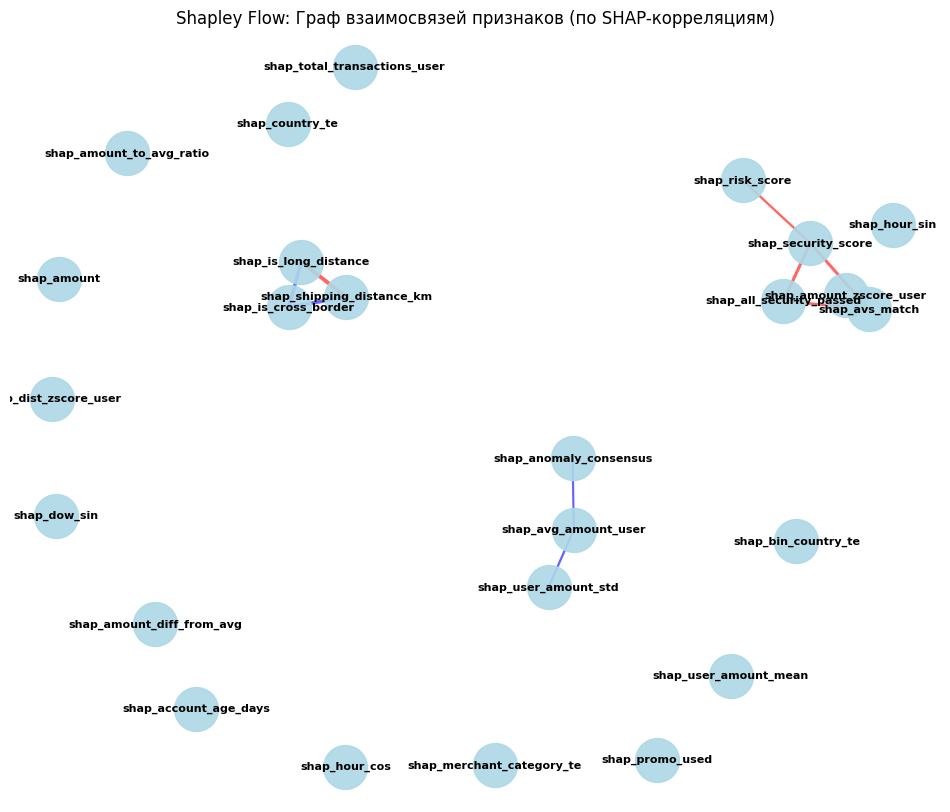

In [ ]:
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.5, seed=42)
edges = G.edges()
colors = [G[u][v]['color'] for u, v in edges]
weights = [G[u][v]['weight'] for u, v in edges]

nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue', alpha=0.9)
nx.draw_networkx_edges(G, pos, edge_color=colors, width=weights, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')
plt.title("Shapley Flow: Граф взаимосвязей признаков (по SHAP-корреляциям)")
plt.axis('off')
plt.show()

In [ ]:
centrality = nx.degree_centrality(G)
if centrality:
    top_hub = max(centrality, key=centrality.get)
    print(f"Самый центральный признак: {top_hub} (Связан с {int(centrality[top_hub]*(len(G)-1))} другими)")

Самый центральный признак: shap_security_score (Связан с 3 другими)


In [ ]:
communities = list(community.greedy_modularity_communities(G))
print(f"\nНайдено {len(communities)} сообществ признаков:")
for i, comm in enumerate(communities):
    if len(comm) > 1:
        print(f"  Группа {i+1}: {list(comm)}...")


Найдено 18 сообществ признаков:
  Группа 1: ['shap_security_score', 'shap_avs_match', 'shap_risk_score', 'shap_all_security_passed']...
  Группа 2: ['shap_shipping_distance_km', 'shap_is_cross_border', 'shap_is_long_distance']...
  Группа 3: ['shap_user_amount_std', 'shap_avg_amount_user', 'shap_anomaly_consensus']...


In [ ]:
shap_corr_test = X_test_emb.corr()
G_test = nx.Graph()
for i in range(len(shap_corr_test.columns)):
    for j in range(i):
        if abs(shap_corr_test.iloc[i, j]) > threshold:
            G_test.add_edge(shap_corr_test.columns[i], shap_corr_test.columns[j])

edges_train = set(G.edges())
edges_test = set(G_test.edges())

disappeared = edges_train - edges_test
appeared = edges_test - edges_train

print(f"Стабильных связей: {len(edges_train.intersection(edges_test))}")
print(f"Исчезло связей: {len(disappeared)}")
print(f"Появилось новых: {len(appeared)}")

if len(appeared) > 0:
    print(f"Пример новой связи: {list(appeared)[0]}")


Стабильных связей: 5
Исчезло связей: 4
Появилось новых: 4
Пример новой связи: ('shap_is_cross_border', 'shap_shipping_distance_km')
